In [18]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

## EDS3_ by Sooroush Riazi

## Data

In [19]:
Country_data = pd.read_csv("Country-data.csv")
Country_data.head()

country  child_mort  exports  health  imports  income  \
0          Afghanistan        90.2     10.0    7.58     44.9    1610   
1              Albania        16.6     28.0    6.55     48.6    9930   
2              Algeria        27.3     38.4    4.17     31.4   12900   
3               Angola       119.0     62.3    2.85     42.9    5900   
4  Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   

   inflation  life_expec  total_fer   gdpp  
0       9.44        56.2       5.82    553  
1       4.49        76.3       1.65   4090  
2      16.10        76.5       2.89   4460  
3      22.40        60.1       6.16   3530  
4       1.44        76.8       2.13  12200

## Pre_Proccessing

### Feture Extraction

converting features from percentage to real value

In [20]:
Country_data['exports'] = Country_data['exports']*Country_data['gdpp']/100
Country_data['imports'] = Country_data['imports']*Country_data['gdpp']/100
Country_data['health'] = Country_data['health']*Country_data['gdpp']/100

### Missing Values

In [21]:
Country_data.isnull().sum()
Country_data.isna().sum()


country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

### Outlier Detection

In [22]:
# Checking outliers at 25%,50%,75%,90%,95% and 99%
Country_data.describe(percentiles=[.25,.5,.75,.90,.95,.99])

child_mort        exports       health        imports         income  \
count  167.000000     167.000000   167.000000     167.000000     167.000000   
mean    38.270060    7420.618847  1056.733204    6588.352108   17144.688623   
std     40.328931   17973.885795  1801.408906   14710.810418   19278.067698   
min      2.600000       1.076920    12.821200       0.651092     609.000000   
25%      8.250000     447.140000    78.535500     640.215000    3355.000000   
50%     19.300000    1777.440000   321.886000    2045.580000    9960.000000   
75%     62.100000    7278.000000   976.940000    7719.600000   22800.000000   
90%    100.220000   17760.600000  3825.416000   15034.280000   41220.000000   
95%    116.000000   31385.100000  4966.701000   24241.560000   48290.000000   
99%    153.400000   64794.260000  8410.330400   55371.390000   84374.000000   
max    208.000000  183750.000000  8663.600000  149100.000000  125000.000000   

        inflation  life_expec   total_fer           gdpp  
count  167.000000  167.000000  167.000000     167.000000  
mean     7.781832   70.555689    2.947964   12964.155689  
std     10.570704    8.893172    1.513848   18328.704809  
min     -4.210000   32.100000    1.150000     231.000000  
25%      1.810000   65.300000    1.795000    1330.000000  
50%      5.390000   73.100000    2.410000    4660.000000  
75%     10.750000   76.800000    3.880000   14050.000000  
90%     16.640000   80.400000    5.322000   41840.000000  
95%     20.870000   81.400000    5.861000   48610.000000  
99%     41.478000   82.370000    6.563600   79088.000000  
max    104.000000   82.800000    7.490000  105000.000000

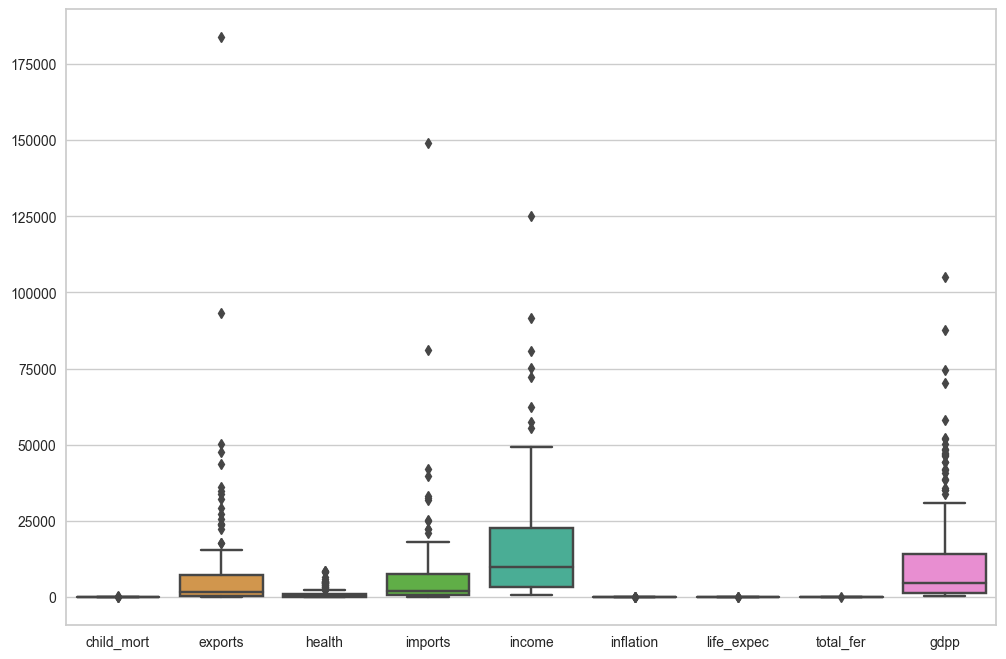

In [23]:
fig = plt.figure(figsize = (12,8))
sns.boxplot(data=Country_data)
plt.show()

In [24]:
print("The number of countries are : ",Country_data.shape[0])

The number of countries are :  167


# Feature Selection:

- We cant Remove ant Features all features are correlated to each other we need all the data
most of features have correlations more than 0.3 with each other


### Correlation Matrix

C:\Users\ASUS\AppData\Local\Temp\ipykernel_155244\2606460146.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(Country_data.corr(),annot = True)


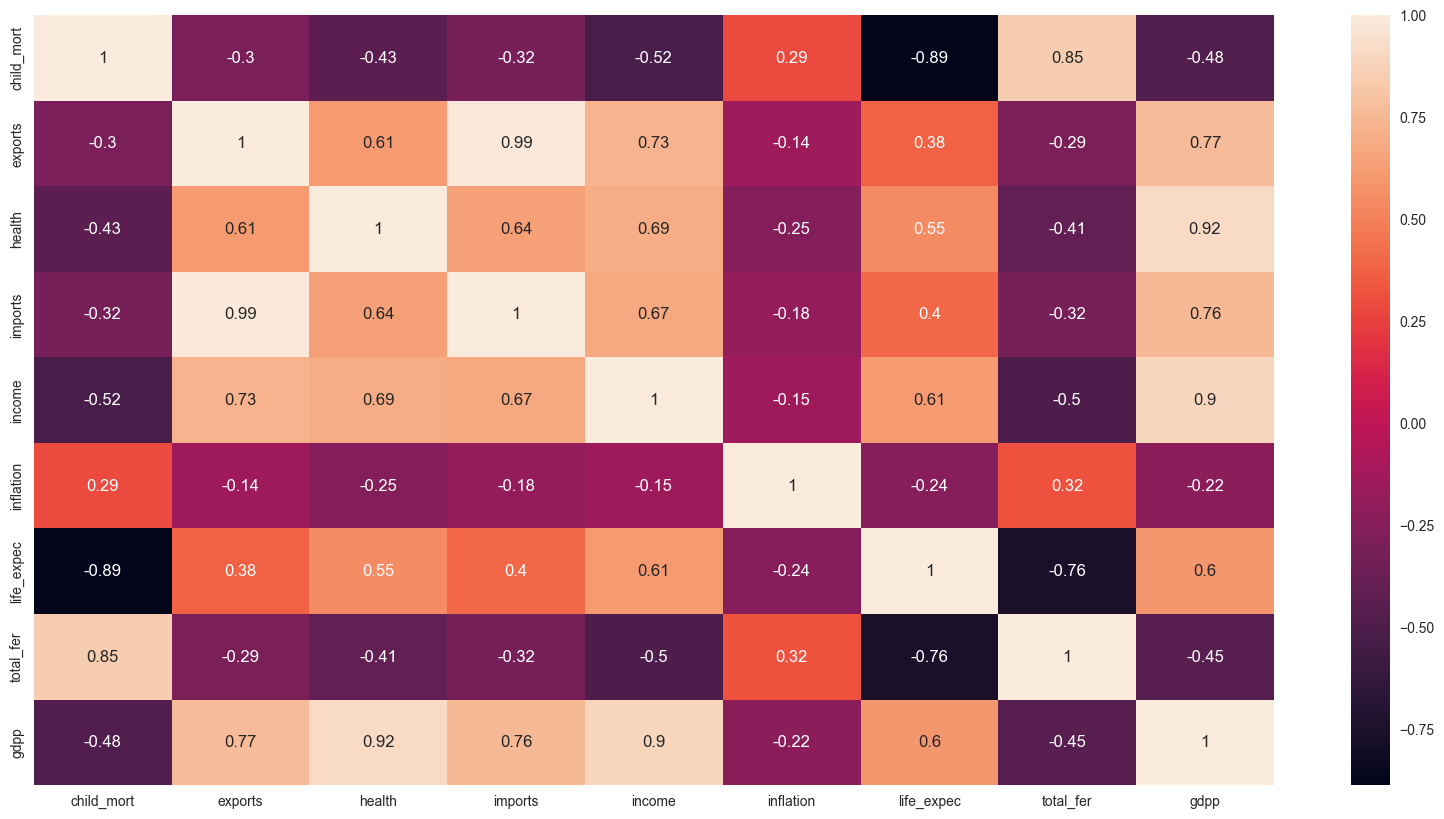

In [25]:
#plotting the correlation matrix
%matplotlib inline
plt.figure(figsize = (20,10))
sns.heatmap(Country_data.corr(),annot = True)
plt.show()

# Scaling:

- Most features have high std, which is bad for models and many big values.
- so we should normilize

In [26]:
Country_data.describe()

child_mort        exports       health        imports         income  \
count  167.000000     167.000000   167.000000     167.000000     167.000000   
mean    38.270060    7420.618847  1056.733204    6588.352108   17144.688623   
std     40.328931   17973.885795  1801.408906   14710.810418   19278.067698   
min      2.600000       1.076920    12.821200       0.651092     609.000000   
25%      8.250000     447.140000    78.535500     640.215000    3355.000000   
50%     19.300000    1777.440000   321.886000    2045.580000    9960.000000   
75%     62.100000    7278.000000   976.940000    7719.600000   22800.000000   
max    208.000000  183750.000000  8663.600000  149100.000000  125000.000000   

        inflation  life_expec   total_fer           gdpp  
count  167.000000  167.000000  167.000000     167.000000  
mean     7.781832   70.555689    2.947964   12964.155689  
std     10.570704    8.893172    1.513848   18328.704809  
min     -4.210000   32.100000    1.150000     231.000000  
25%      1.810000   65.300000    1.795000    1330.000000  
50%      5.390000   73.100000    2.410000    4660.000000  
75%     10.750000   76.800000    3.880000   14050.000000  
max    104.000000   82.800000    7.490000  105000.000000

### Scaling the Data

In [27]:
from sklearn.preprocessing import StandardScaler
Country_data1=Country_data.drop('country',axis=1) ## Droping string feature country name.
standard_scaler = StandardScaler()
Country_scaled = standard_scaler.fit_transform(Country_data1)
Country_scaled=pd.DataFrame(Country_scaled)
Country_scaled.columns=Country_data1.columns

# K Means

In [28]:
from sklearn.cluster import KMeans
kmeans = KMeans(random_state=42)

## Finding K
- distortion , silhouette

c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `

c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `

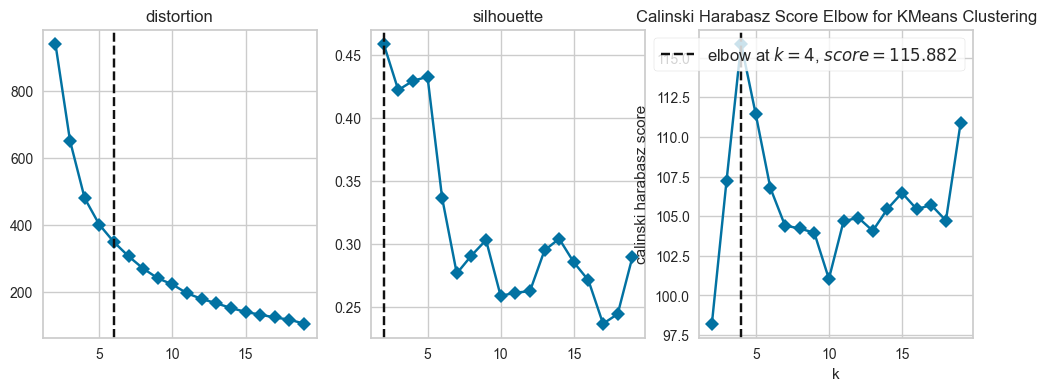

<AxesSubplot: title={'center': 'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [29]:
from yellowbrick.cluster import KElbowVisualizer
methods = ['distortion', 'silhouette', 'calinski_harabasz']
plt.figure(figsize=(12,4))
X=Country_scaled
count=0
for i in methods:
    count=count+1
    visualizer = KElbowVisualizer(kmeans, k=(2,20), metric = i, timings = False)
    plt.subplot(1,3,count)
    plt.title(i)
    visualizer.fit(X)
    #visualizer.show()
visualizer.show()

# Silhouette
- # Part 1-3-2 & 3:

Number of Clusters= 2 Score is : 0.45863306035476264
Number of Clusters= 3 Score is : 0.4218615812599681
Number of Clusters= 4 Score is : 0.42914711278370843
Number of Clusters= 5 Score is : 0.43347478209451806
Number of Clusters= 6 Score is : 0.3927936961757552
Number of Clusters= 7 Score is : 0.31136565295133073
Number of Clusters= 8 Score is : 0.29631301482377276
Number of Clusters= 9 Score is : 0.30336562440083975
Number of Clusters= 10 Score is : 0.3047039855577163


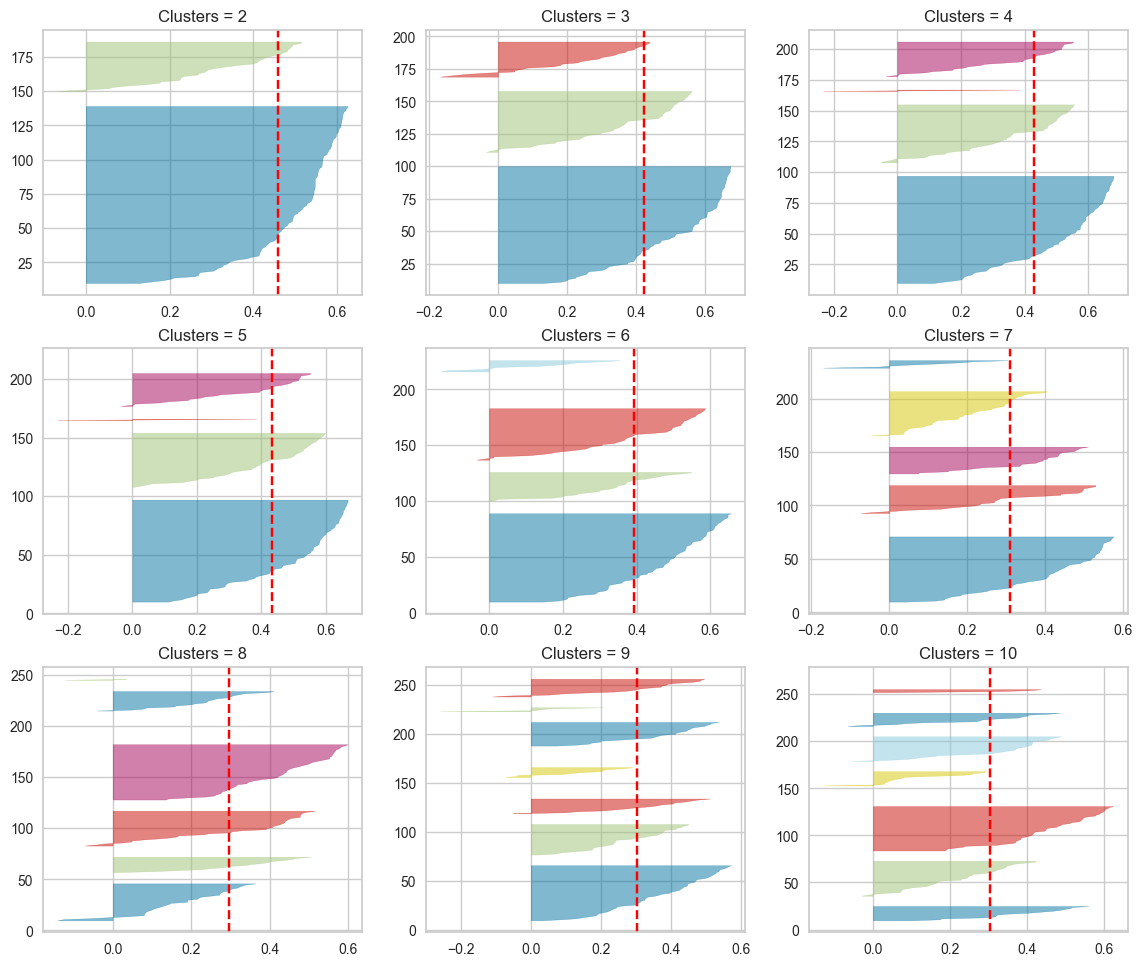

In [30]:
# sub plot
from yellowbrick.cluster import SilhouetteVisualizer
plt.figure(figsize=(14,20))
for k in range(2,11):
    plt.subplot(5, 3, k - 1)
    visualizer = SilhouetteVisualizer(
        KMeans(k, n_init=150), colors='yellowbrick')
    visualizer.fit(X)
    strr='Clusters = '+ str(k)
    plt.title(strr)
    print('Number of Clusters=',k,'Score is :', visualizer.silhouette_score_)
    # visualizer.show()
    

# K-Means with best K:

In [70]:
kmeans = KMeans(n_clusters=5, n_init=42)
kmeans.fit(X)

KMeans(n_clusters=5, n_init=42)

In [73]:
Country_data['Class']=kmeans.predict(X)

In [79]:
Country_data.loc[0].country

'Afghanistan'

In [87]:
for i in Country_data.Class.unique():
    print("Cluster ", i,':\n')
    print(Country_data[Country_data.Class == i].country.values)    
"""x
print('Class 0:')
print('Class 1:')
print(Country_data[Country_data['Class']==1].country.values,sep='\n')
print('Class 2:')
print(Country_data[Country_data['Class']==2].country.values,sep='\n')
"""

Cluster  0 :

['Afghanistan' 'Angola' 'Benin' 'Botswana' 'Burkina Faso' 'Burundi'
 'Cameroon' 'Central African Republic' 'Chad' 'Comoros' 'Congo, Dem. Rep.'
 'Congo, Rep.' "Cote d'Ivoire" 'Equatorial Guinea' 'Eritrea' 'Gabon'
 'Gambia' 'Ghana' 'Guinea' 'Guinea-Bissau' 'Haiti' 'Iraq' 'Kenya'
 'Kiribati' 'Lao' 'Lesotho' 'Liberia' 'Madagascar' 'Malawi' 'Mali'
 'Mauritania' 'Mozambique' 'Namibia' 'Niger' 'Pakistan' 'Rwanda' 'Senegal'
 'Sierra Leone' 'Solomon Islands' 'South Africa' 'Sudan' 'Tanzania'
 'Timor-Leste' 'Togo' 'Uganda' 'Yemen' 'Zambia']
Cluster  1 :

['Albania' 'Algeria' 'Antigua and Barbuda' 'Argentina' 'Armenia'
 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus'
 'Belize' 'Bhutan' 'Bolivia' 'Bosnia and Herzegovina' 'Brazil' 'Bulgaria'
 'Cambodia' 'Cape Verde' 'Chile' 'China' 'Colombia' 'Costa Rica' 'Croatia'
 'Czech Republic' 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador'
 'Estonia' 'Fiji' 'Georgia' 'Grenada' 'Guatemala' 'Guyana' 'Hungary'
 'India' 'Ind

"x\nprint('Class 0:')\nprint('Class 1:')\nprint(Country_data[Country_data['Class']==1].country.values,sep='\n')\nprint('Class 2:')\nprint(Country_data[Country_data['Class']==2].country.values,sep='\n')\n"

# Analysing the Clusters

- Correlated Features are easier to seprate
- inflation and childmort are not correlated that much and data is not sepratable
- Most Features are important but we can see the same patterns in lots of pair plots

<Figure size 2000x2000 with 0 Axes>

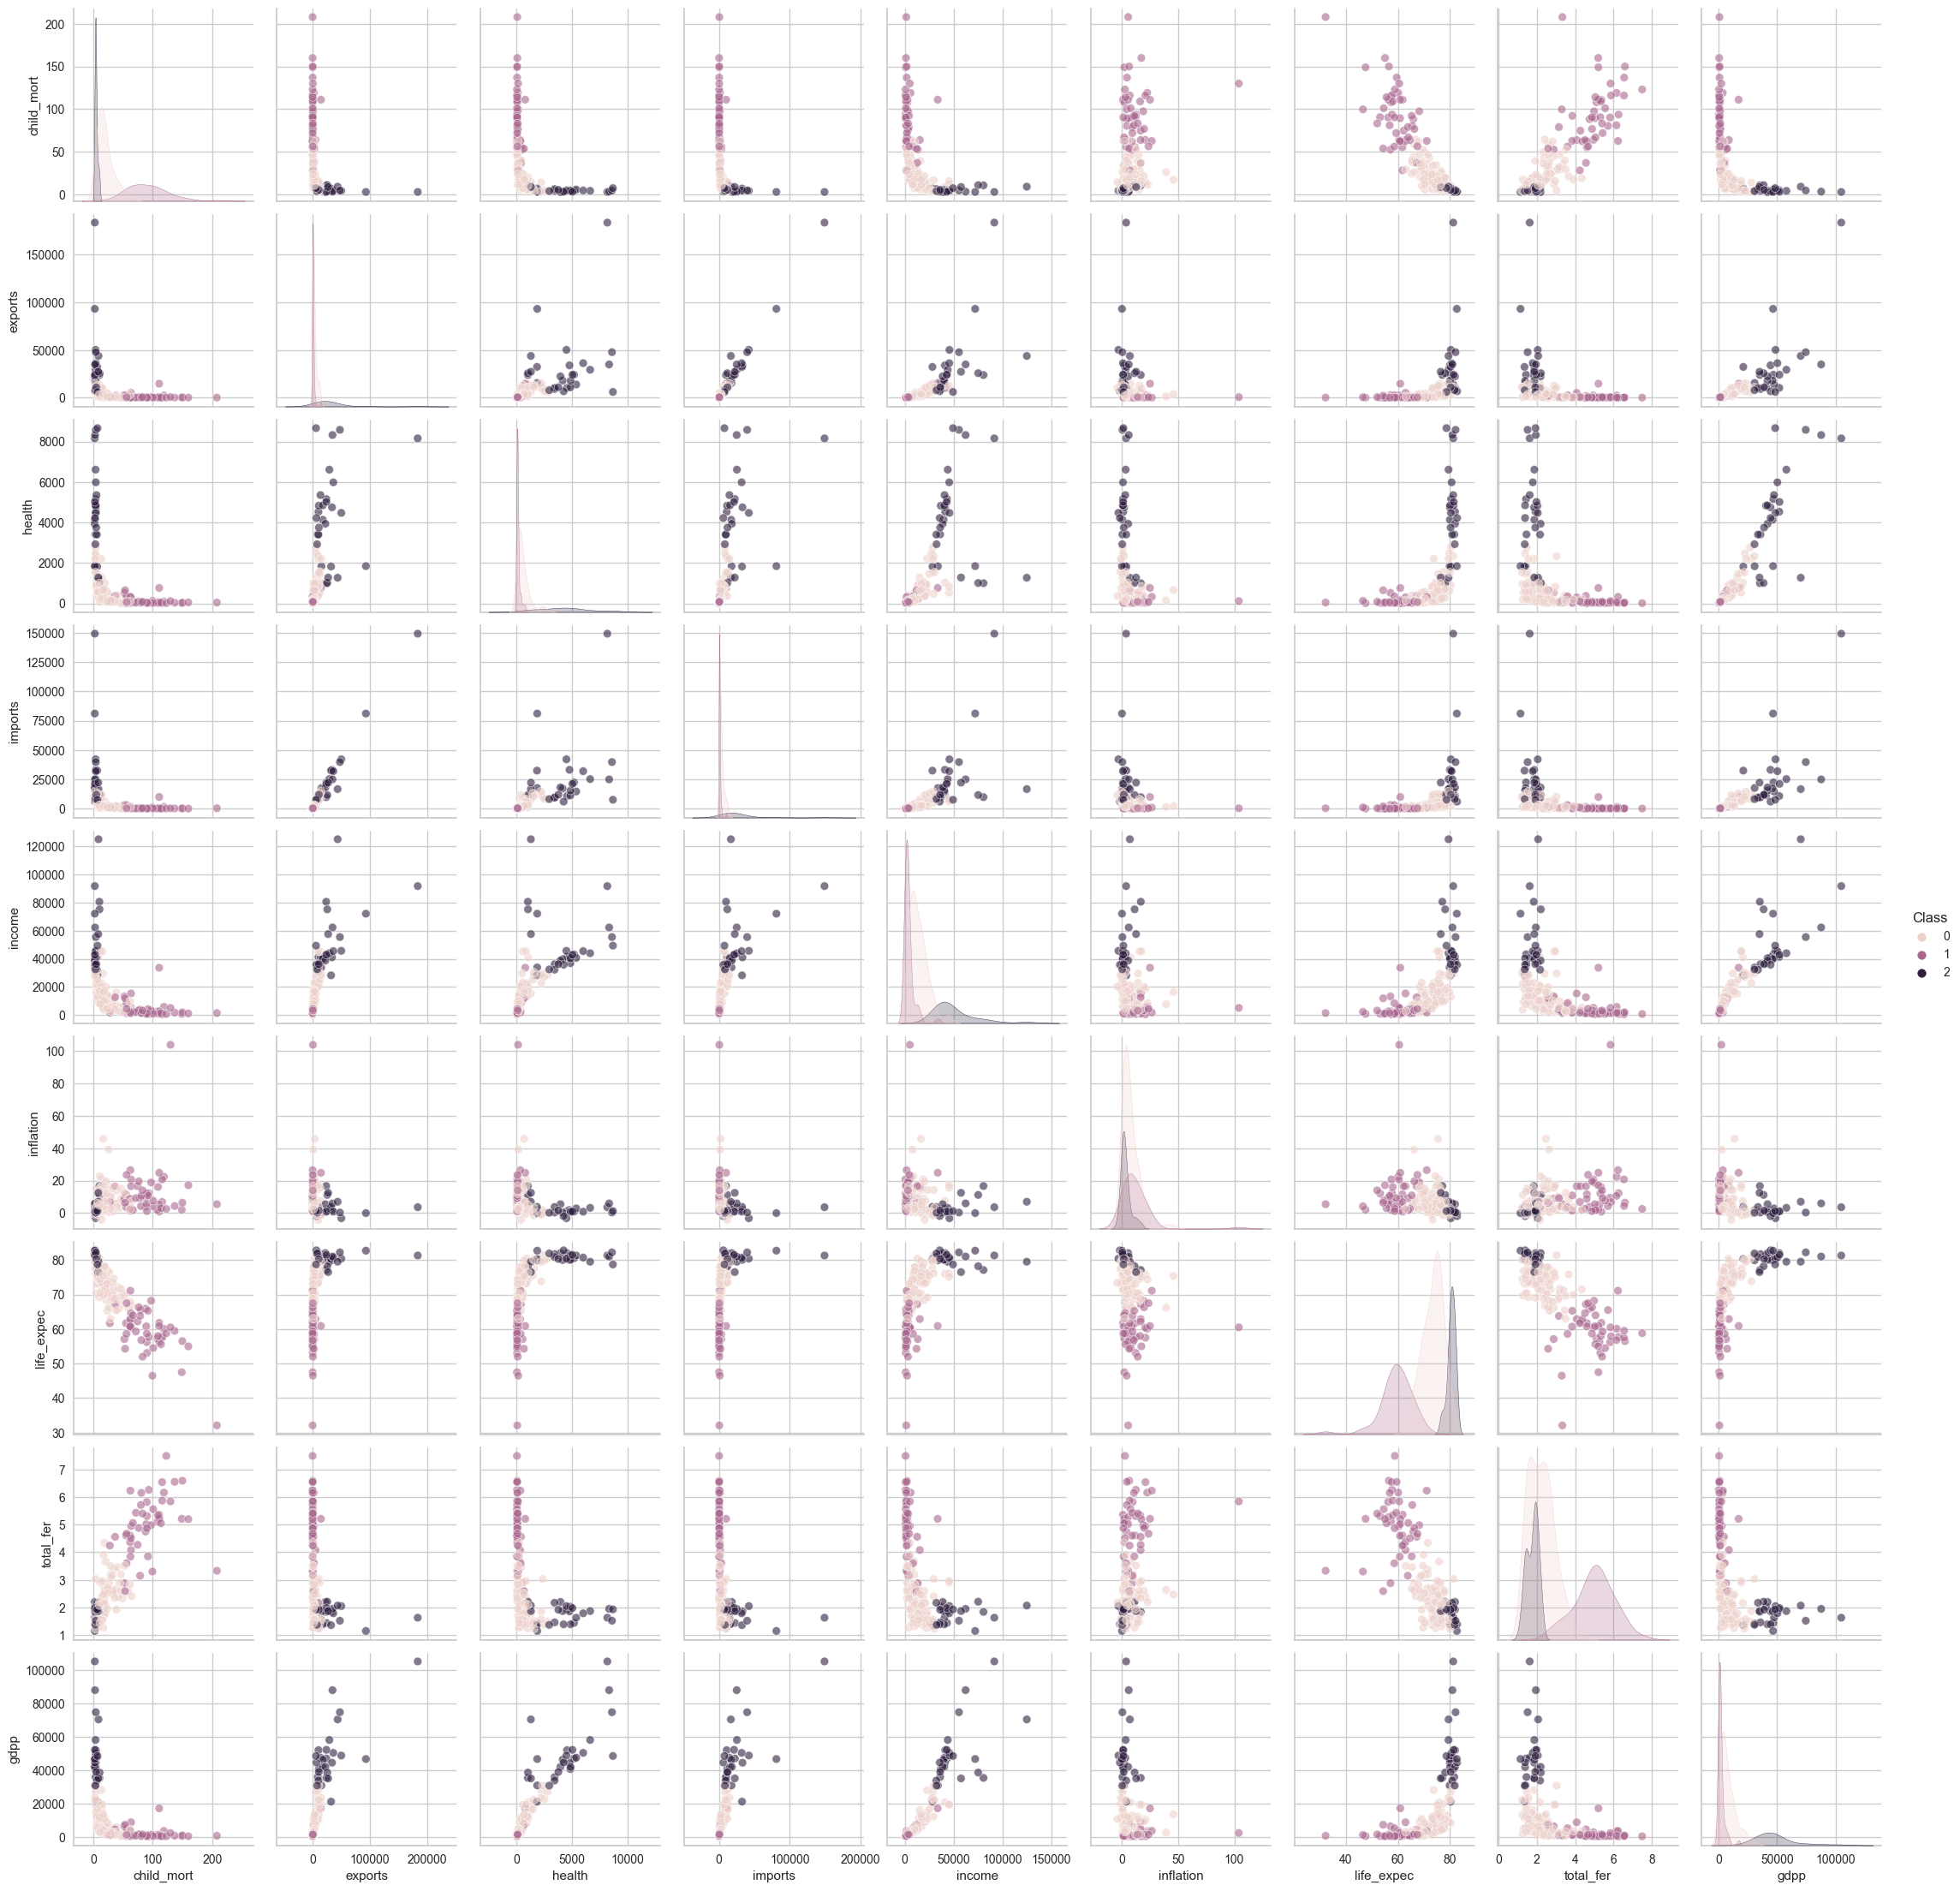

In [34]:
# pairplot drop country with alpha
plt.figure(figsize=(20,20))
sns.pairplot(Country_data, plot_kws={'alpha': 0.6},hue='Class')
plt.show()

#### Visualization

In [35]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
pca = PCA(n_components=2)
X_pca1 = pca.fit_transform(X)
X_pca1=pd.DataFrame(X_pca1)

X_pca1.columns=['PCA1','PCA2']
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X)
X_tsne1=pd.DataFrame(X_tsne)
X_tsne1.columns=['TSNE1','TSNE2']

<AxesSubplot: xlabel='PCA1', ylabel='PCA2'>

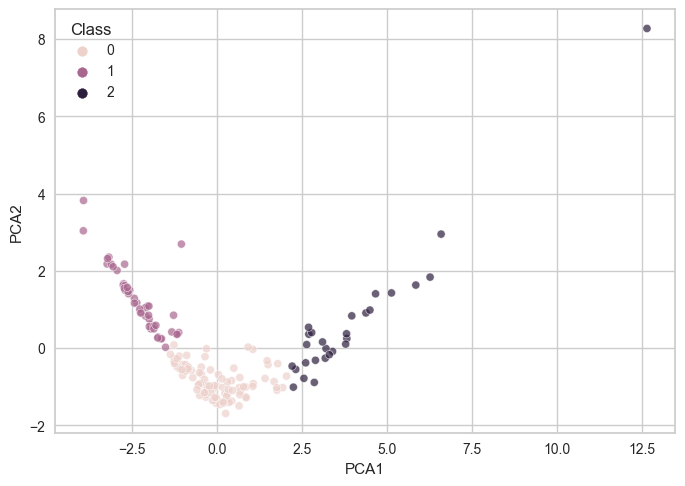

In [36]:
sns.scatterplot(x=X_pca1['PCA1'],y=X_pca1['PCA2'],hue=Country_data.Class,alpha=0.7,s=35)

<AxesSubplot: xlabel='TSNE1', ylabel='TSNE2'>

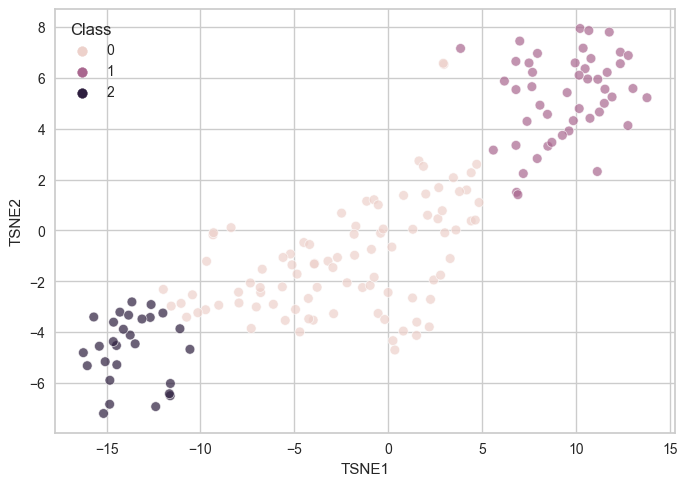

In [37]:
sns.scatterplot(x=X_tsne1['TSNE1'],y=X_tsne1['TSNE2'],hue=Country_data.Class,alpha=0.7)

In [38]:
Cluster_GDPP=pd.DataFrame(Country_data.groupby(["Class"]).gdpp.mean())
Cluster_child_mort=pd.DataFrame(Country_data.groupby(["Class"]).child_mort.mean())
Cluster_exports=pd.DataFrame(Country_data.groupby(["Class"]).exports.mean())
Cluster_income=pd.DataFrame(Country_data.groupby(["Class"]).income.mean())
Cluster_health=pd.DataFrame(Country_data.groupby(["Class"]).health.mean())
Cluster_imports=pd.DataFrame(Country_data.groupby(["Class"]).imports.mean())
Cluster_inflation=pd.DataFrame(Country_data.groupby(["Class"]).inflation.mean())
Cluster_life_expec=pd.DataFrame(Country_data.groupby(["Class"]).life_expec.mean())
Cluster_total_fer=pd.DataFrame(Country_data.groupby(["Class"]).total_fer.mean())

In [39]:
Cluster_df = pd.concat([Cluster_GDPP,Cluster_child_mort,Cluster_income,Cluster_exports,Cluster_health,
                Cluster_imports,Cluster_inflation,Cluster_life_expec,Cluster_total_fer], axis=1)
Cluster_df.rename(index={0: 'Developing C' },inplace=True)
Cluster_df.rename(index={1: 'Developed C'},inplace=True)
Cluster_df.rename(index={2: 'Under-developed C'},inplace=True)
Cluster_df

gdpp  child_mort        income       exports  \
Class                                                                     
Developing C        7979.912088   20.357143  13968.021978   3604.149434   
Developed C         1909.208333   91.610417   3897.354167    879.063521   
Under-developed C  48114.285714    5.046429  50178.571429  31038.239286   

                        health       imports  inflation  life_expec  total_fer  
Class                                                                           
Developing C        547.279455   3710.446386   7.070549   73.460440   2.235055  
Developed C         114.821765    827.028771  11.911146   59.239583   4.992083  
Under-developed C  4327.163214  25818.100000   3.014679   80.514286   1.760714

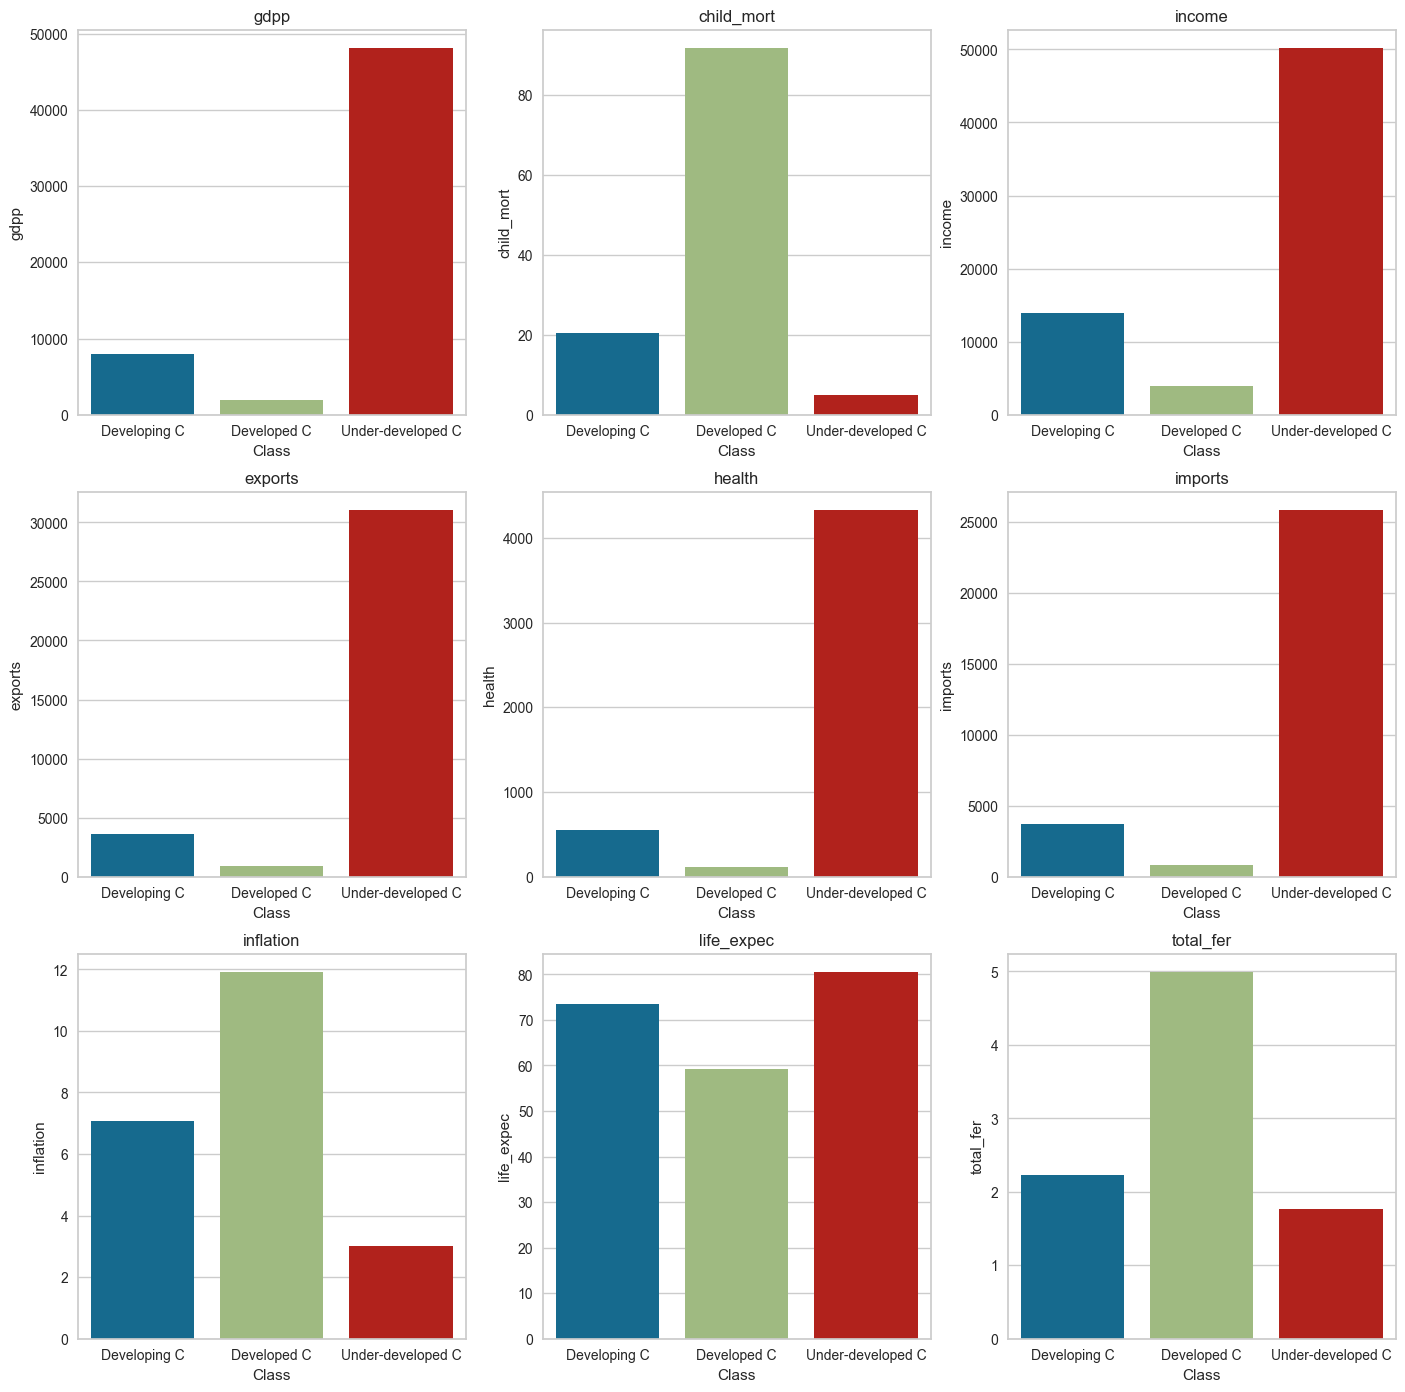

In [40]:
plt.figure(figsize=(17,17))
for j,i in enumerate(Cluster_df.columns):
    plt.subplot(3,3,j+1)
    s=sns.barplot(x=Cluster_df.index,y=i,data=Cluster_df)
    plt.title(i)

# Comparing GM with K-Means

In [41]:
from sklearn.mixture import GaussianMixture
gm = GaussianMixture(random_state=42,n_components=3)
Country_data['GmClass']=gm.fit_predict(X)

In [42]:
print('Class 0:')
print(Country_data[Country_data['GmClass']==0].country.values,sep='\n')
print('Class 1:')
print(Country_data[Country_data['GmClass']==1].country.values,sep='\n')
print('Class 2:')
print(Country_data[Country_data['GmClass']==2].country.values,sep='\n')

Class 0:
['Albania' 'Algeria' 'Antigua and Barbuda' 'Argentina' 'Armenia'
 'Azerbaijan' 'Bahamas' 'Bahrain' 'Barbados' 'Belarus'
 'Bosnia and Herzegovina' 'Brazil' 'Bulgaria' 'Cape Verde' 'Chile' 'China'
 'Colombia' 'Costa Rica' 'Croatia' 'Czech Republic' 'Dominican Republic'
 'Ecuador' 'Egypt' 'Estonia' 'Gabon' 'Georgia' 'Grenada' 'Guyana'
 'Hungary' 'Indonesia' 'Iran' 'Israel' 'Jamaica' 'Jordan' 'Kazakhstan'
 'Latvia' 'Lebanon' 'Libya' 'Lithuania' 'Macedonia, FYR' 'Malaysia'
 'Maldives' 'Mauritius' 'Micronesia, Fed. Sts.' 'Moldova' 'Montenegro'
 'Oman' 'Panama' 'Peru' 'Poland' 'Romania' 'Russia' 'Saudi Arabia'
 'Serbia' 'Seychelles' 'Slovak Republic' 'South Korea' 'Sri Lanka'
 'St. Vincent and the Grenadines' 'Suriname' 'Thailand' 'Tonga' 'Tunisia'
 'Turkey' 'Uruguay' 'Venezuela' 'Vietnam']
Class 1:
['Afghanistan' 'Angola' 'Bangladesh' 'Belize' 'Benin' 'Bhutan' 'Bolivia'
 'Botswana' 'Burkina Faso' 'Burundi' 'Cambodia' 'Cameroon'
 'Central African Republic' 'Chad' 'Comoros' 'Congo, De

In [43]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
def siloplot():
    # silhouette graph for SpectralClustering
    silhouette_avg = silhouette_score(X, Country_data['GmClass'])
    plt.figure(figsize=(10,10))
    plt.title("Silhouette graph for SpectralClustering")
    plt.xlabel("Silhouette coefficient values")
    plt.ylabel("Cluster label")
    silhouette_values = silhouette_samples(X, Country_data['GmClass'])
    y_lower = 10
    for i in (Country_data['GmClass'].unique()):
        ith_cluster_silhouette_values = silhouette_values[Country_data['GmClass'] == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        color = plt.cm.nipy_spectral(float(i) / 4)
        plt.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)
        plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10
    plt.axvline(x=silhouette_avg, color="red", linestyle="--")
    #plt.show()

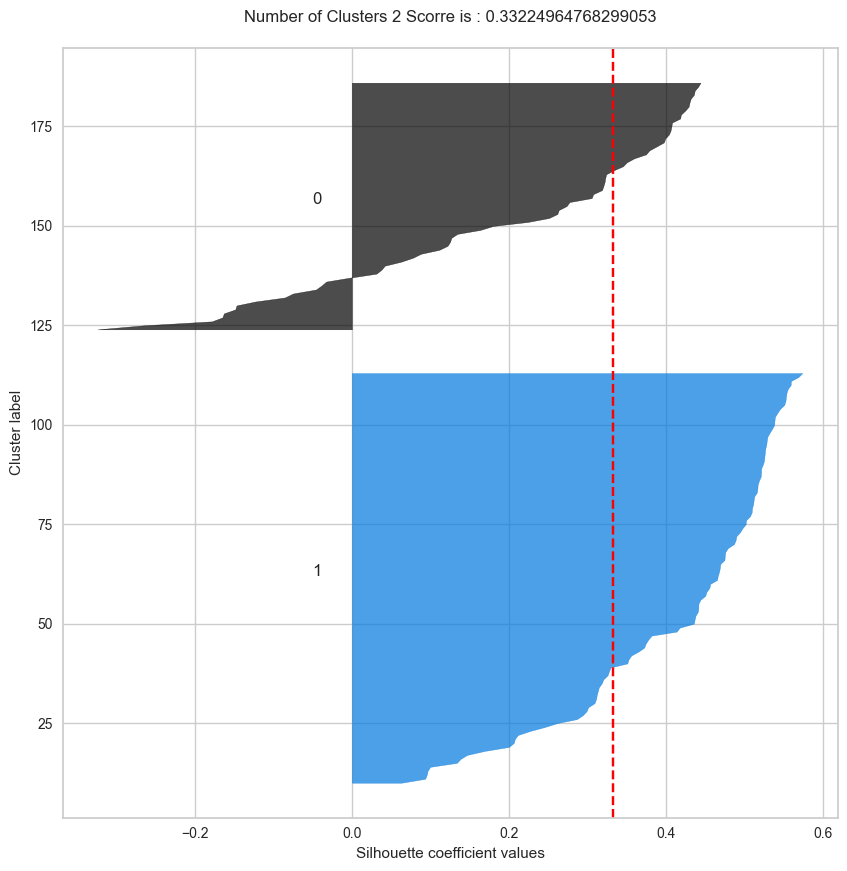

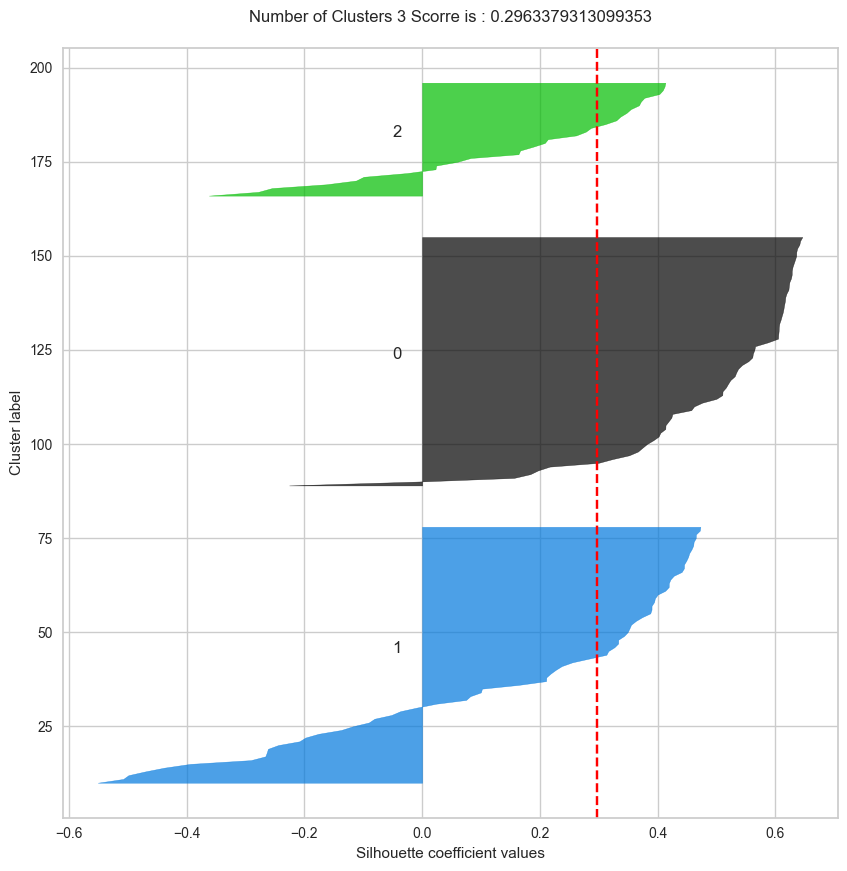

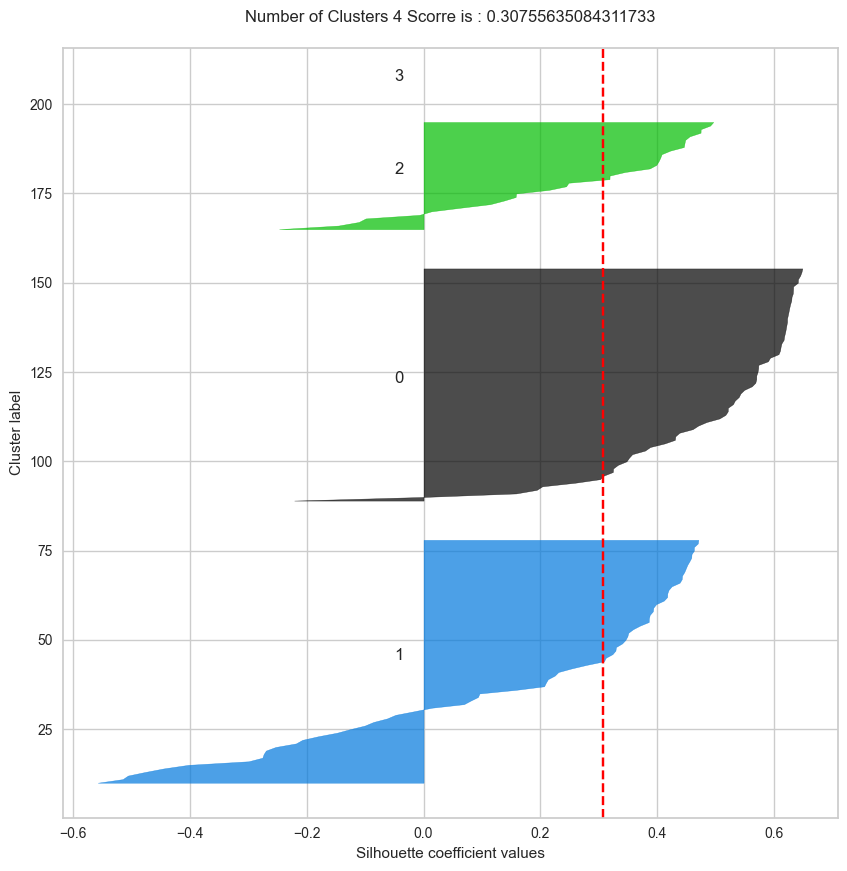

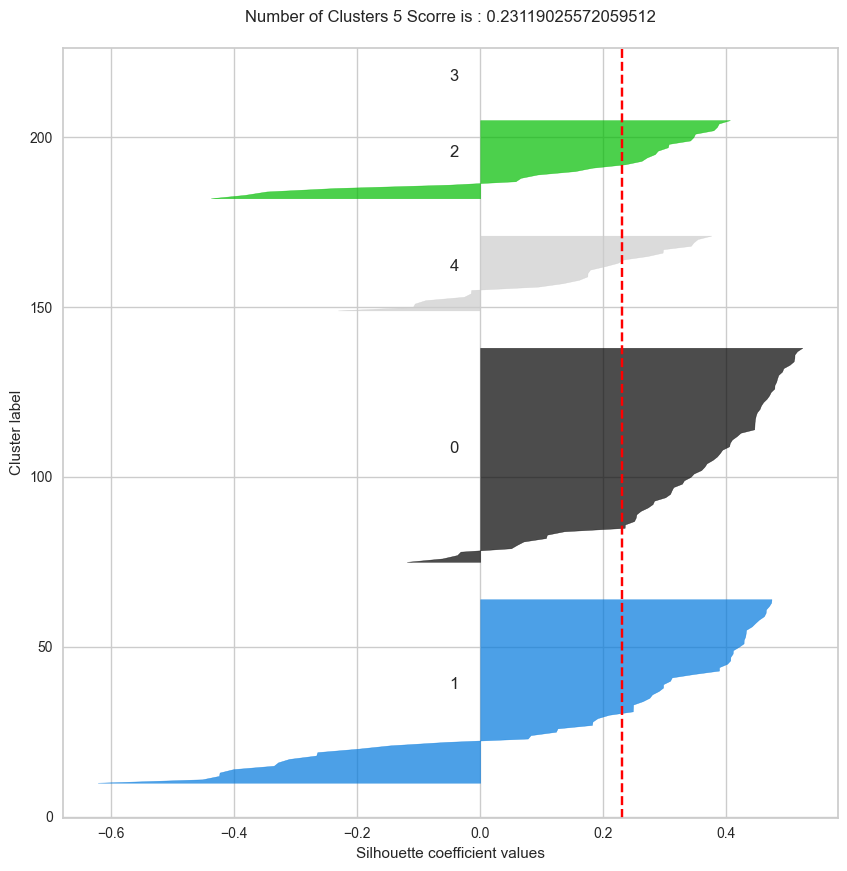

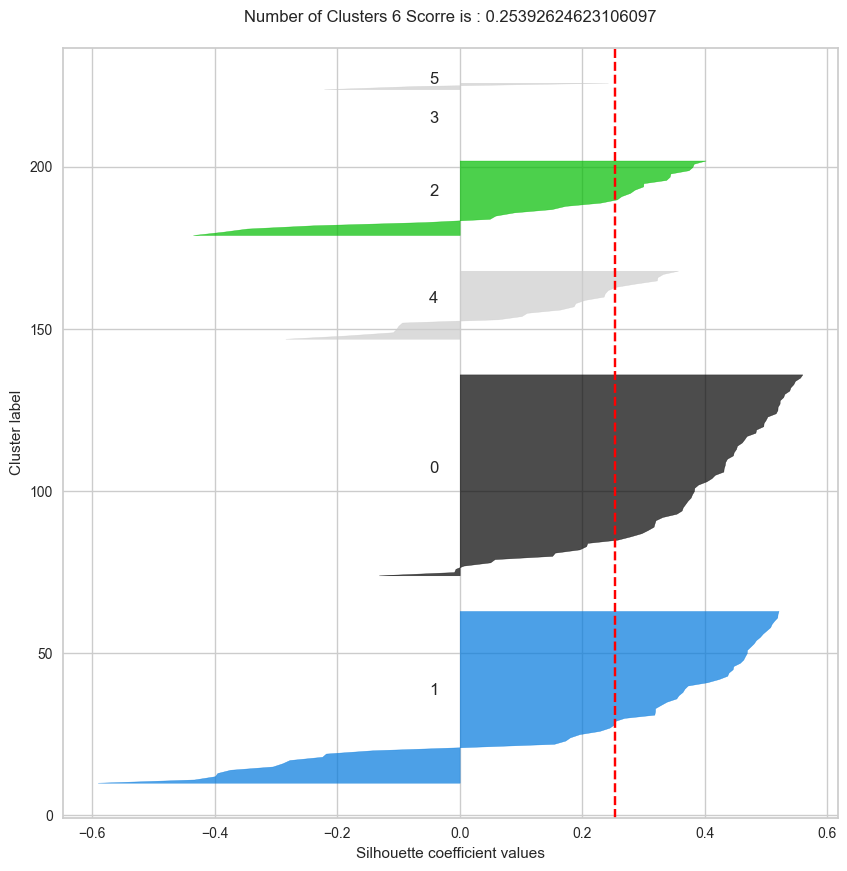

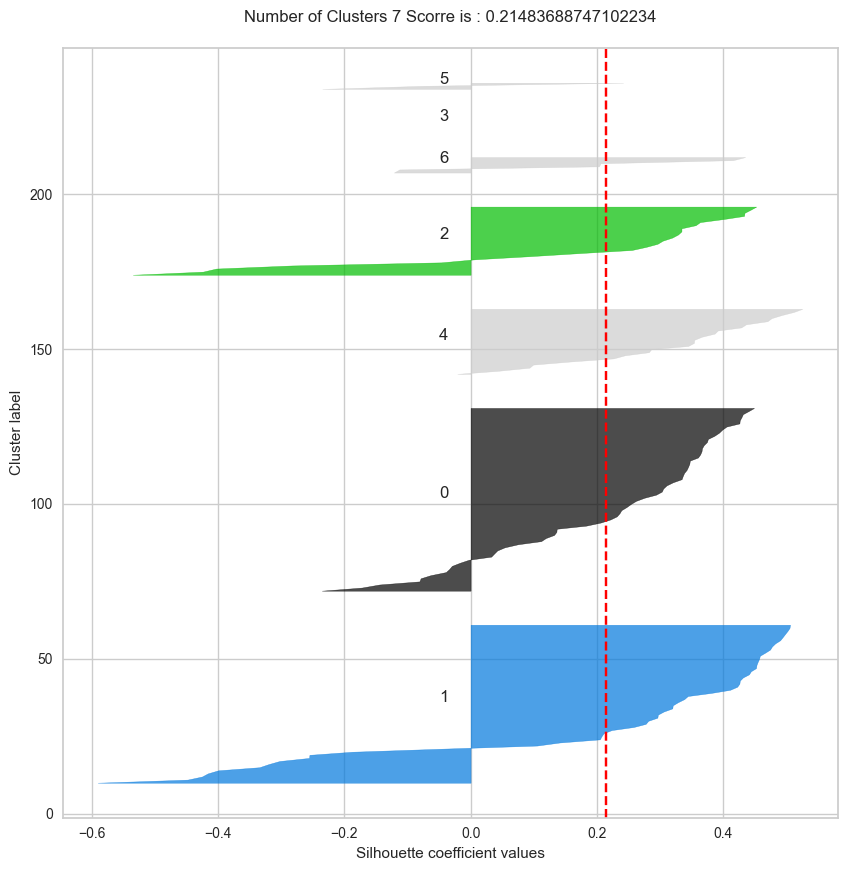

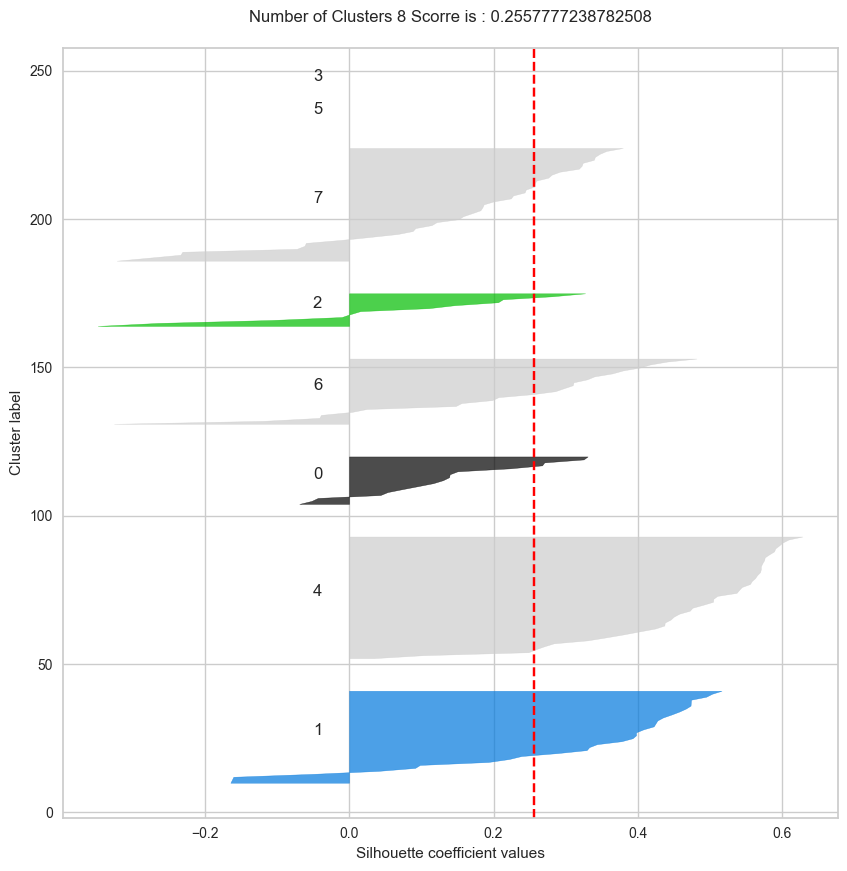

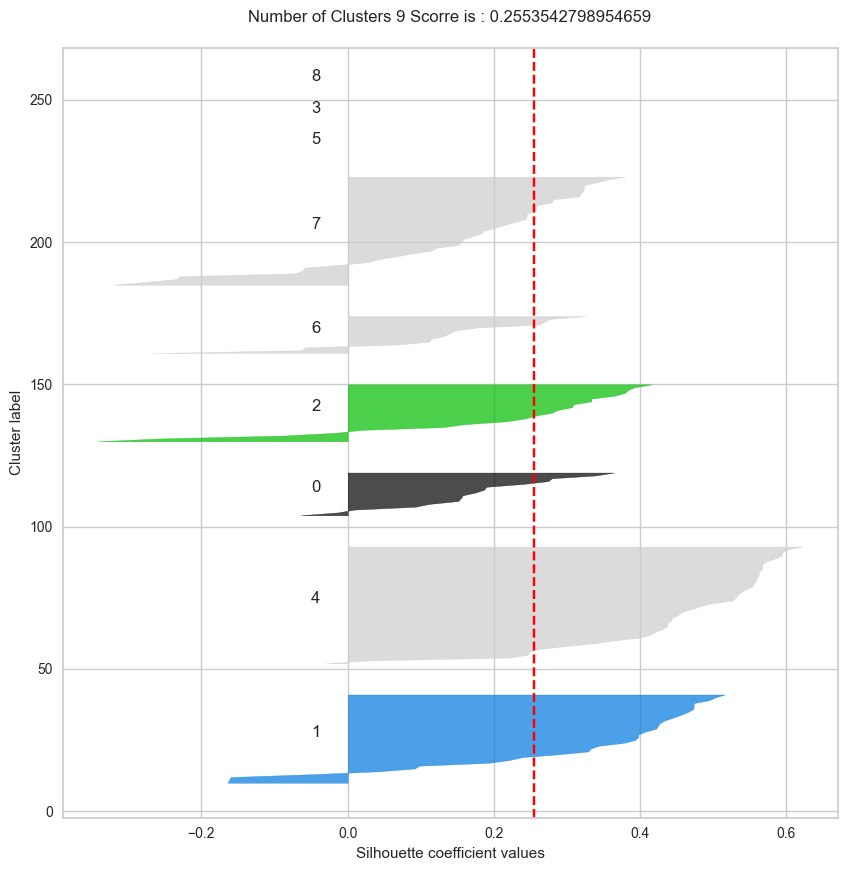

In [44]:
from sklearn.metrics import  silhouette_score
for k in range(2,10):
    gm = GaussianMixture(random_state=42,n_components=k)
    gm.fit(X)
    Country_data['GmClass']=gm.predict(X)
    strr='Number of Clusters '+str(k)+' Scorre is : '+str(silhouette_score(X, Country_data['GmClass']))+'\n'
    siloplot()
    plt.title(strr)
    #sns.histplot(Country_data['GmClass'])
    plt.show()

In [45]:
from sklearn.mixture import GaussianMixture
gm = GaussianMixture(random_state=42,n_components=3)
Country_data['GmClass']=gm.fit_predict(X)

#### Visualization

Text(0.5, 1.0, 'GMM')

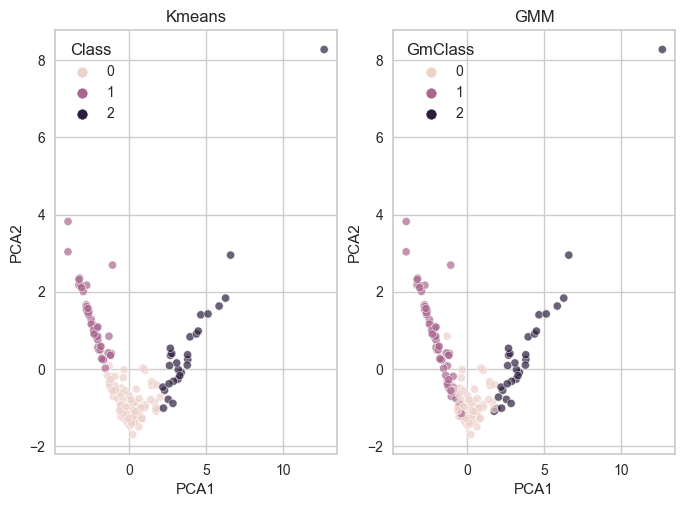

In [46]:
plt.subplot(1,2,1)
sns.scatterplot(x=X_pca1['PCA1'],y=X_pca1['PCA2'],hue=Country_data.Class,alpha=0.7,s=35)
plt.title('Kmeans')
plt.subplot(1,2,2)
sns.scatterplot(x=X_pca1['PCA1'],y=X_pca1['PCA2'],hue=Country_data.GmClass,alpha=0.7,s=35)
plt.title('GMM')


Text(0.5, 1.0, 'GMM')

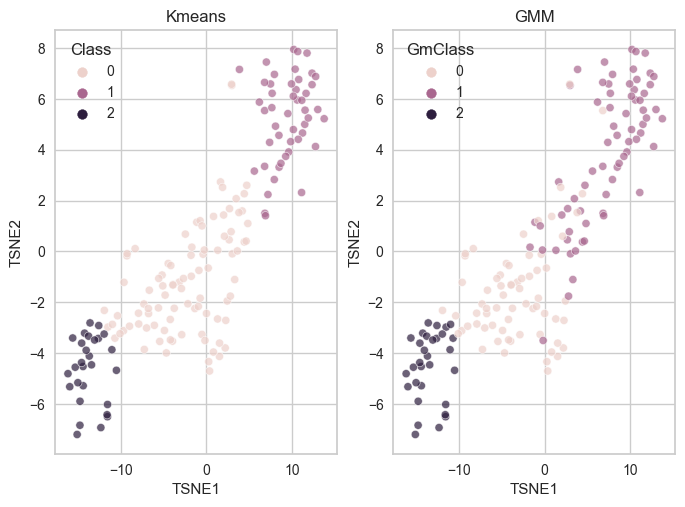

In [47]:
plt.subplot(1,2,1)
sns.scatterplot(x=X_tsne1['TSNE1'],y=X_tsne1['TSNE2'],hue=Country_data.Class,alpha=0.7,s=35)
plt.title('Kmeans')
plt.subplot(1,2,2)
sns.scatterplot(x=X_tsne1['TSNE1'],y=X_tsne1['TSNE2'],hue=Country_data.GmClass,alpha=0.7,s=35)
plt.title('GMM')

In [48]:
Country_data.loc[X_pca1[X_pca1['PCA2']>6].index]

country  child_mort   exports  health   imports  income  inflation  \
91  Luxembourg         2.8  183750.0  8158.5  149100.0   91700       3.62   

    life_expec  total_fer    gdpp  Class  GmClass  
91        81.3       1.63  105000      2        2

In [49]:
Country_data[Country_data.country=='United States']

country  child_mort  exports  health  imports  income  inflation  \
159  United States         7.3   6001.6  8663.6   7647.2   49400       1.22   

     life_expec  total_fer   gdpp  Class  GmClass  
159        78.7       1.93  48400      2        2

#### Features Pair Plot

<Figure size 2000x2000 with 0 Axes>

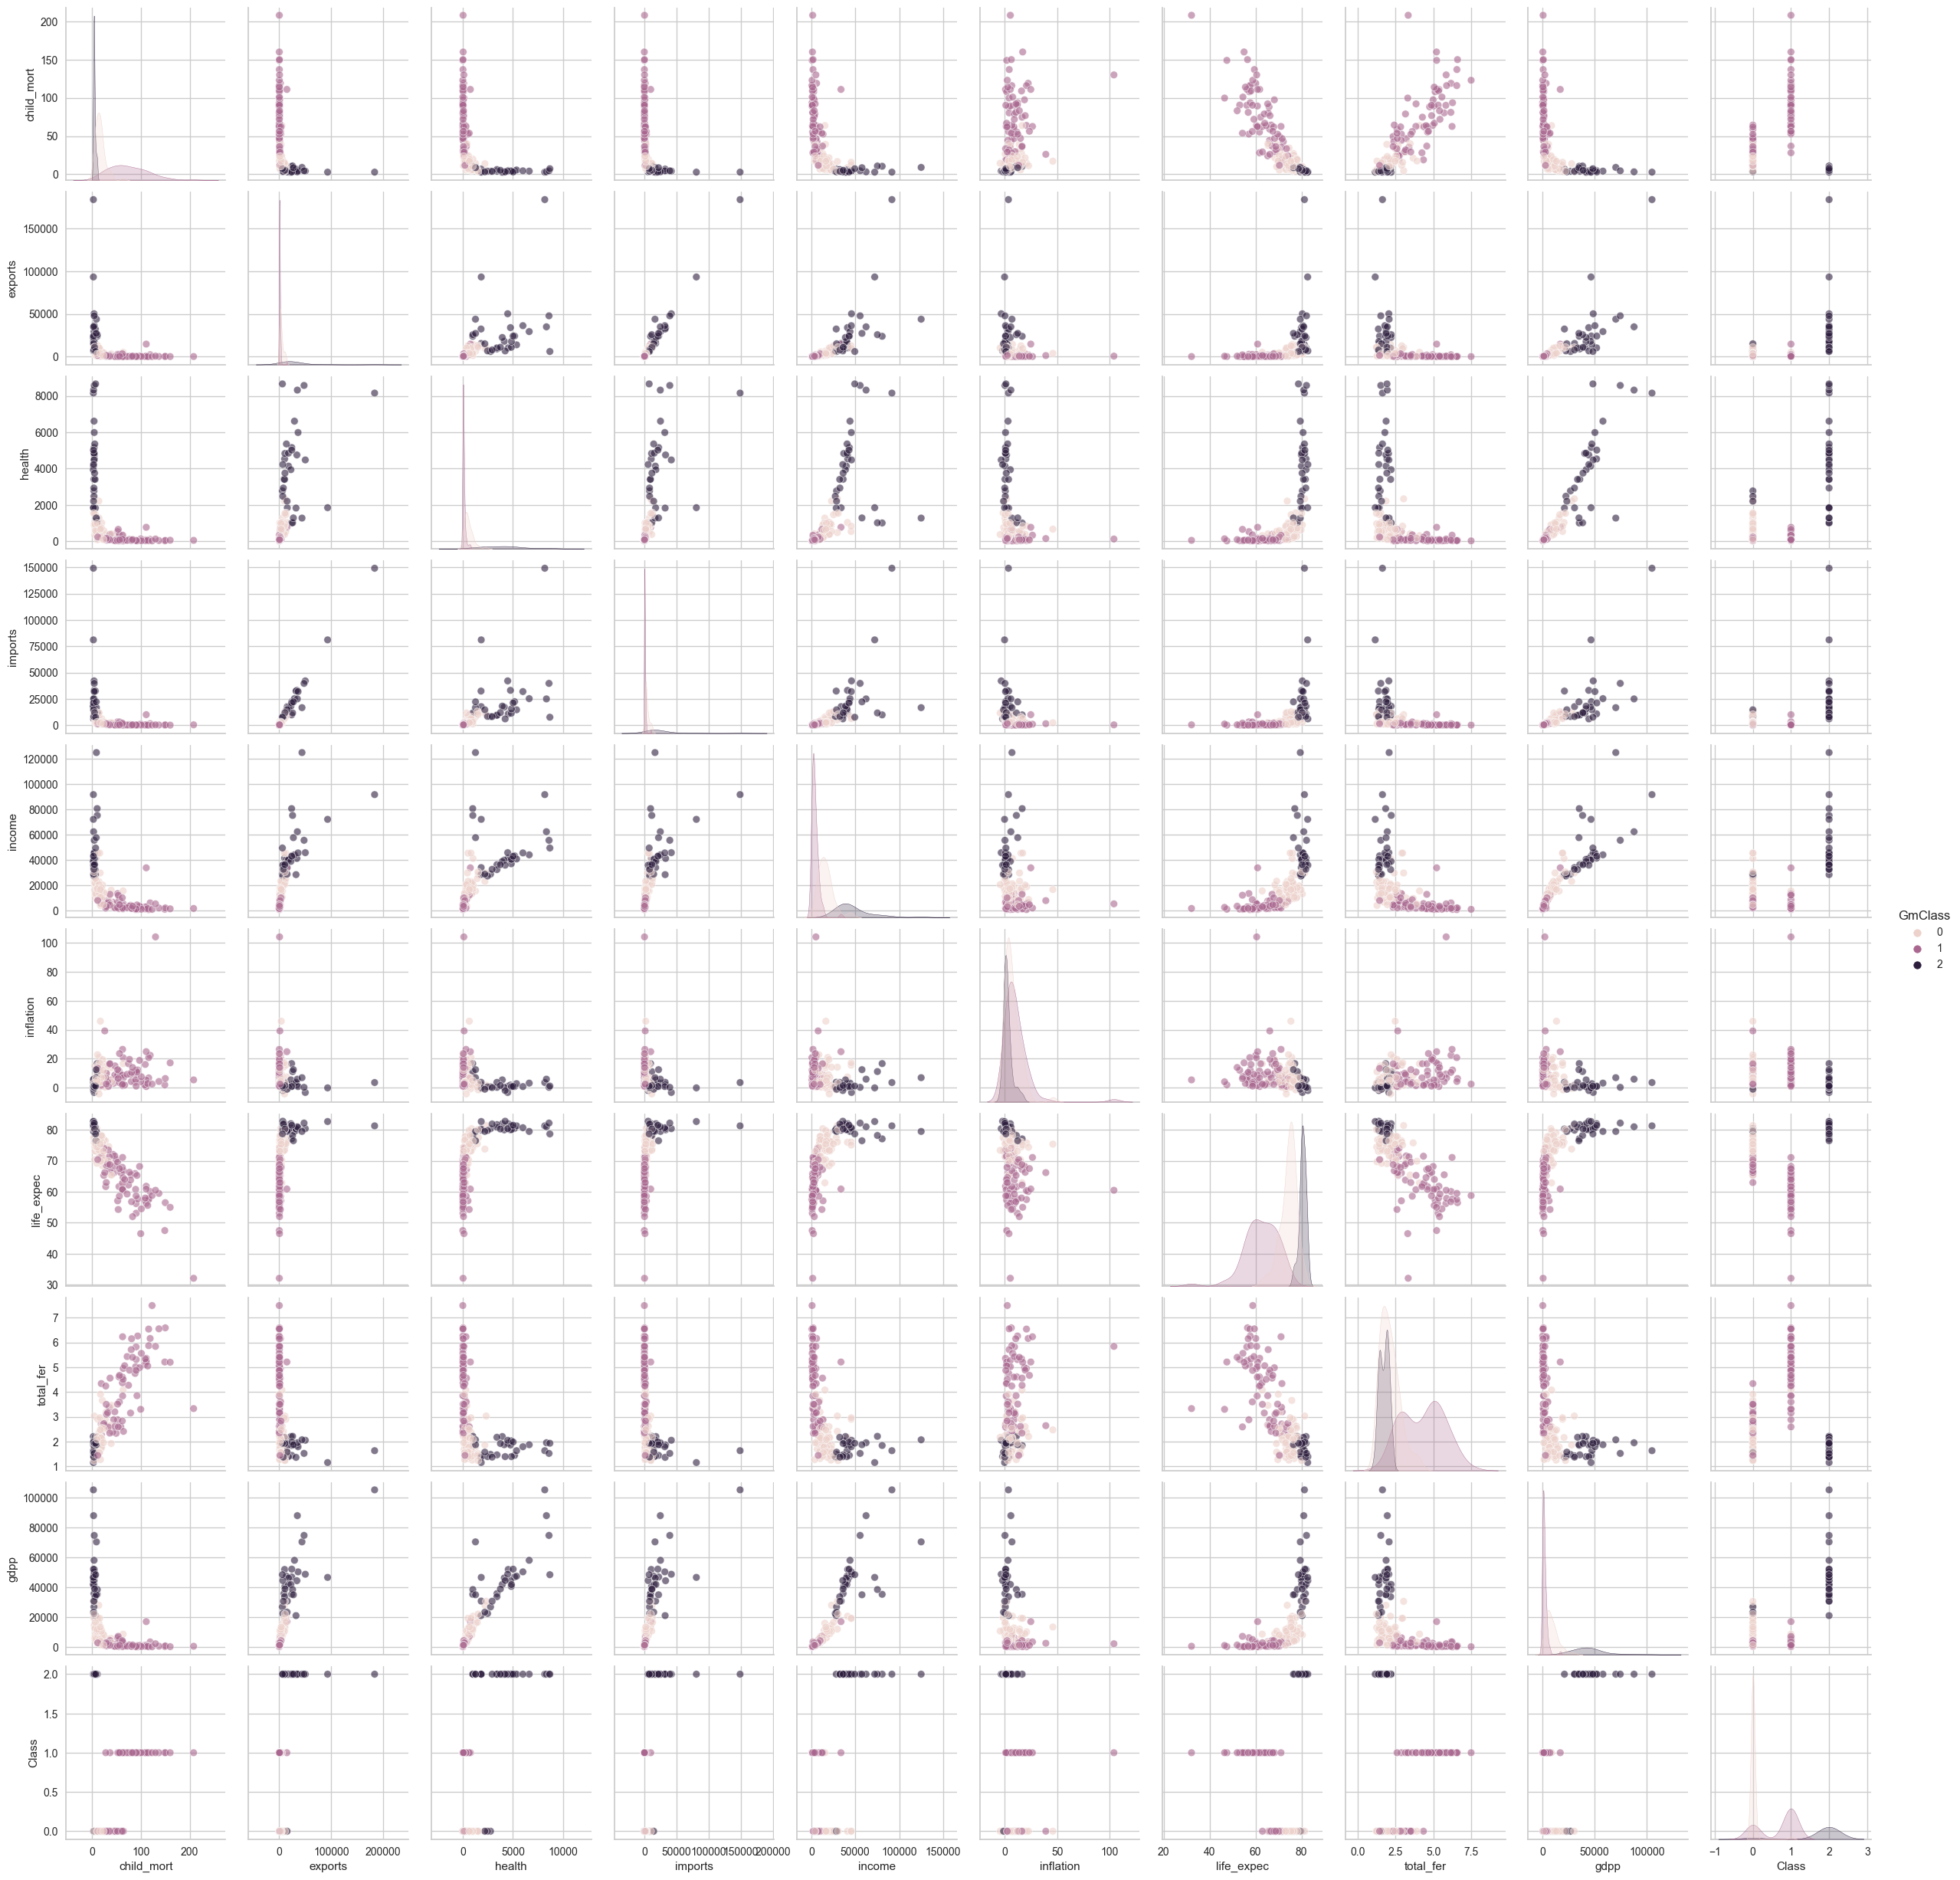

In [50]:
# pairplot drop country with alpha
plt.figure(figsize=(20,20))
sns.pairplot(Country_data, plot_kws={'alpha': 0.6},hue='GmClass')
plt.show()

## PCA

# Final PCA:

In [51]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
pca = PCA(n_components=9)
X_pca1 = pca.fit_transform(X)
X_pca1=pd.DataFrame(X_pca1)
X_pca1.columns=['PCA1','PCA2','PCA3','PCA4','PCA5','PCA6','PCA7','PCA8','PCA9']


In [52]:
pca.explained_variance_

array([5.33631081e+00, 1.67006556e+00, 8.97406142e-01, 5.49797220e-01,
       2.74267850e-01, 2.22718073e-01, 8.50864327e-02, 1.40921616e-02,
       4.47261467e-03])

In [53]:
 np.cumsum(pca.explained_variance_)

array([5.33631081, 7.00637637, 7.90378252, 8.45357974, 8.72784759,
       8.95056566, 9.03565209, 9.04974425, 9.05421687])

### explained_variance and Scree Plot

# How much does PCA capture:
- we can see from scree plot that explained variance doesnt change alot from 4 commponents 
- so 3 or 4 components would be good

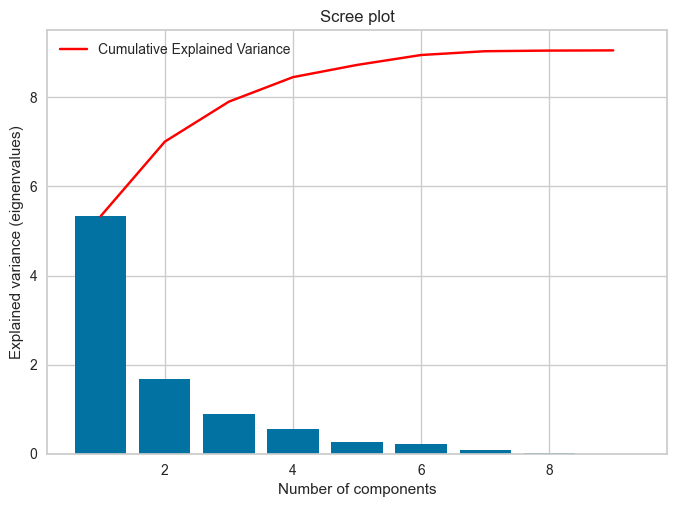

In [54]:
plt.bar(
    range(1,len(pca.explained_variance_)+1),
    pca.explained_variance_
    )
 
 
plt.xlabel('PCA Feature')
plt.ylabel('Explained variance')
plt.title('Feature Explained Variance')

plt.plot(
    range(1,len(pca.explained_variance_ )+1),
    np.cumsum(pca.explained_variance_),
    c='red',
    label='Cumulative Explained Variance')
plt.legend(loc='upper left')
plt.xlabel('Number of components')
plt.ylabel('Explained variance (eignenvalues)')
plt.title('Scree plot')
plt.show()

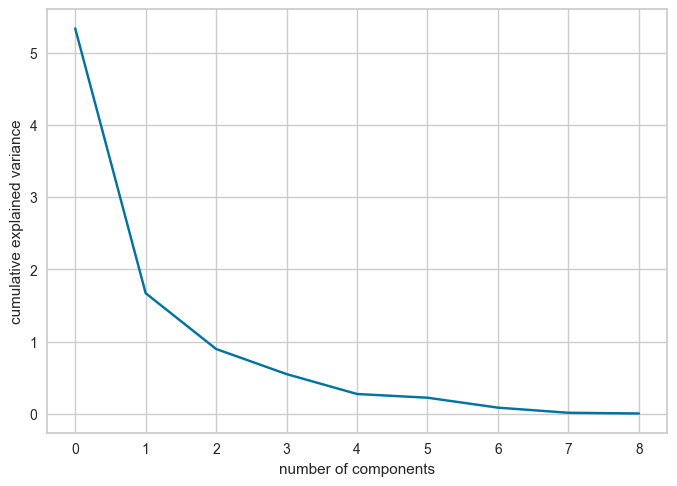

In [55]:
plt.plot(pca.explained_variance_)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [56]:
# Principal components correlation coefficients
loadings = pca.components_
 
# Number of features before PCA
n_features = pca.n_features_
 
# Feature names before PCA
feature_names = X.columns
 
# PC names
pc_list = [f'PC{i}' for i in list(range(1, n_features + 1))]
 
# Match PC names to loadings
pc_loadings = dict(zip(pc_list, loadings))
 
# Matrix of corr coefs between feature names and PCs
loadings_df = pd.DataFrame.from_dict(pc_loadings)
loadings_df['feature_names'] = feature_names
loadings_df = loadings_df.set_index('feature_names')
loadings_df

c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:101: FutureWarning: Attribute `n_features_` was deprecated in version 1.2 and will be removed in 1.4. Use `n_features_in_` instead.
  warnings.warn(msg, category=FutureWarning)


PC1       PC2       PC3       PC4       PC5       PC6  \
feature_names                                                               
child_mort    -0.316392  0.476267 -0.150012 -0.148052  0.101995  0.196585   
exports        0.342887  0.397311 -0.030574  0.449425 -0.038538 -0.038911   
health         0.358535  0.155053 -0.075703 -0.599712 -0.493200  0.180699   
imports        0.344865  0.370781 -0.072174  0.461798 -0.252787 -0.012180   
income         0.380041  0.128384  0.145764 -0.154806  0.794075 -0.038147   
inflation     -0.143085  0.221261  0.948419 -0.007628 -0.136423  0.108403   
life_expec     0.343857 -0.369820  0.196752 -0.018395 -0.154041 -0.586010   
total_fer     -0.302842  0.459715 -0.077834 -0.213928 -0.020336 -0.753901   
gdpp           0.399988  0.200624  0.010339 -0.364772  0.087501  0.045382   

                    PC7       PC8       PC9  
feature_names                                
child_mort     0.761267  0.006444 -0.004951  
exports       -0.013670 -0.055264 -0.717924  
health        -0.064616  0.430072 -0.130346  
imports        0.027182  0.131135  0.665687  
income        -0.023113  0.393811  0.079011  
inflation     -0.022077 -0.006070  0.011281  
life_expec     0.581208  0.002966 -0.031594  
total_fer     -0.273145  0.034293  0.023682  
gdpp          -0.044023 -0.799022  0.128464

### 2D plot With Vectors

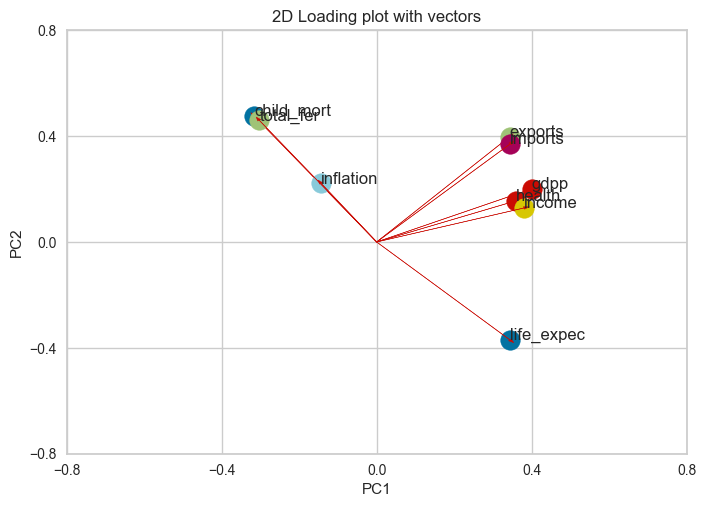

In [57]:
import matplotlib.pyplot as plt 
import numpy as np
 
# Get the loadings of x and y axes
xs = loadings[0]
ys = loadings[1]
zip
# this code is made by sooroush riazi
# Plot the loadings on a scatterplot
for i, varnames in enumerate(feature_names):
    plt.scatter(xs[i], ys[i], s=200)
    plt.arrow(
        0, 0, # coordinates of arrow base
        xs[i], # length of the arrow along x
        ys[i], # length of the arrow along y
        color='r', 
        head_width=0.01
        )
    plt.text(xs[i], ys[i], varnames)
 
# Define the axes
xticks = np.linspace(-0.8, 0.8, num=5)
yticks = np.linspace(-0.8, 0.8, num=5)
plt.xticks(xticks)
plt.yticks(yticks)
plt.xlabel('PC1')
plt.ylabel('PC2')
 
# Show plot
plt.title('2D Loading plot with vectors')
plt.show()

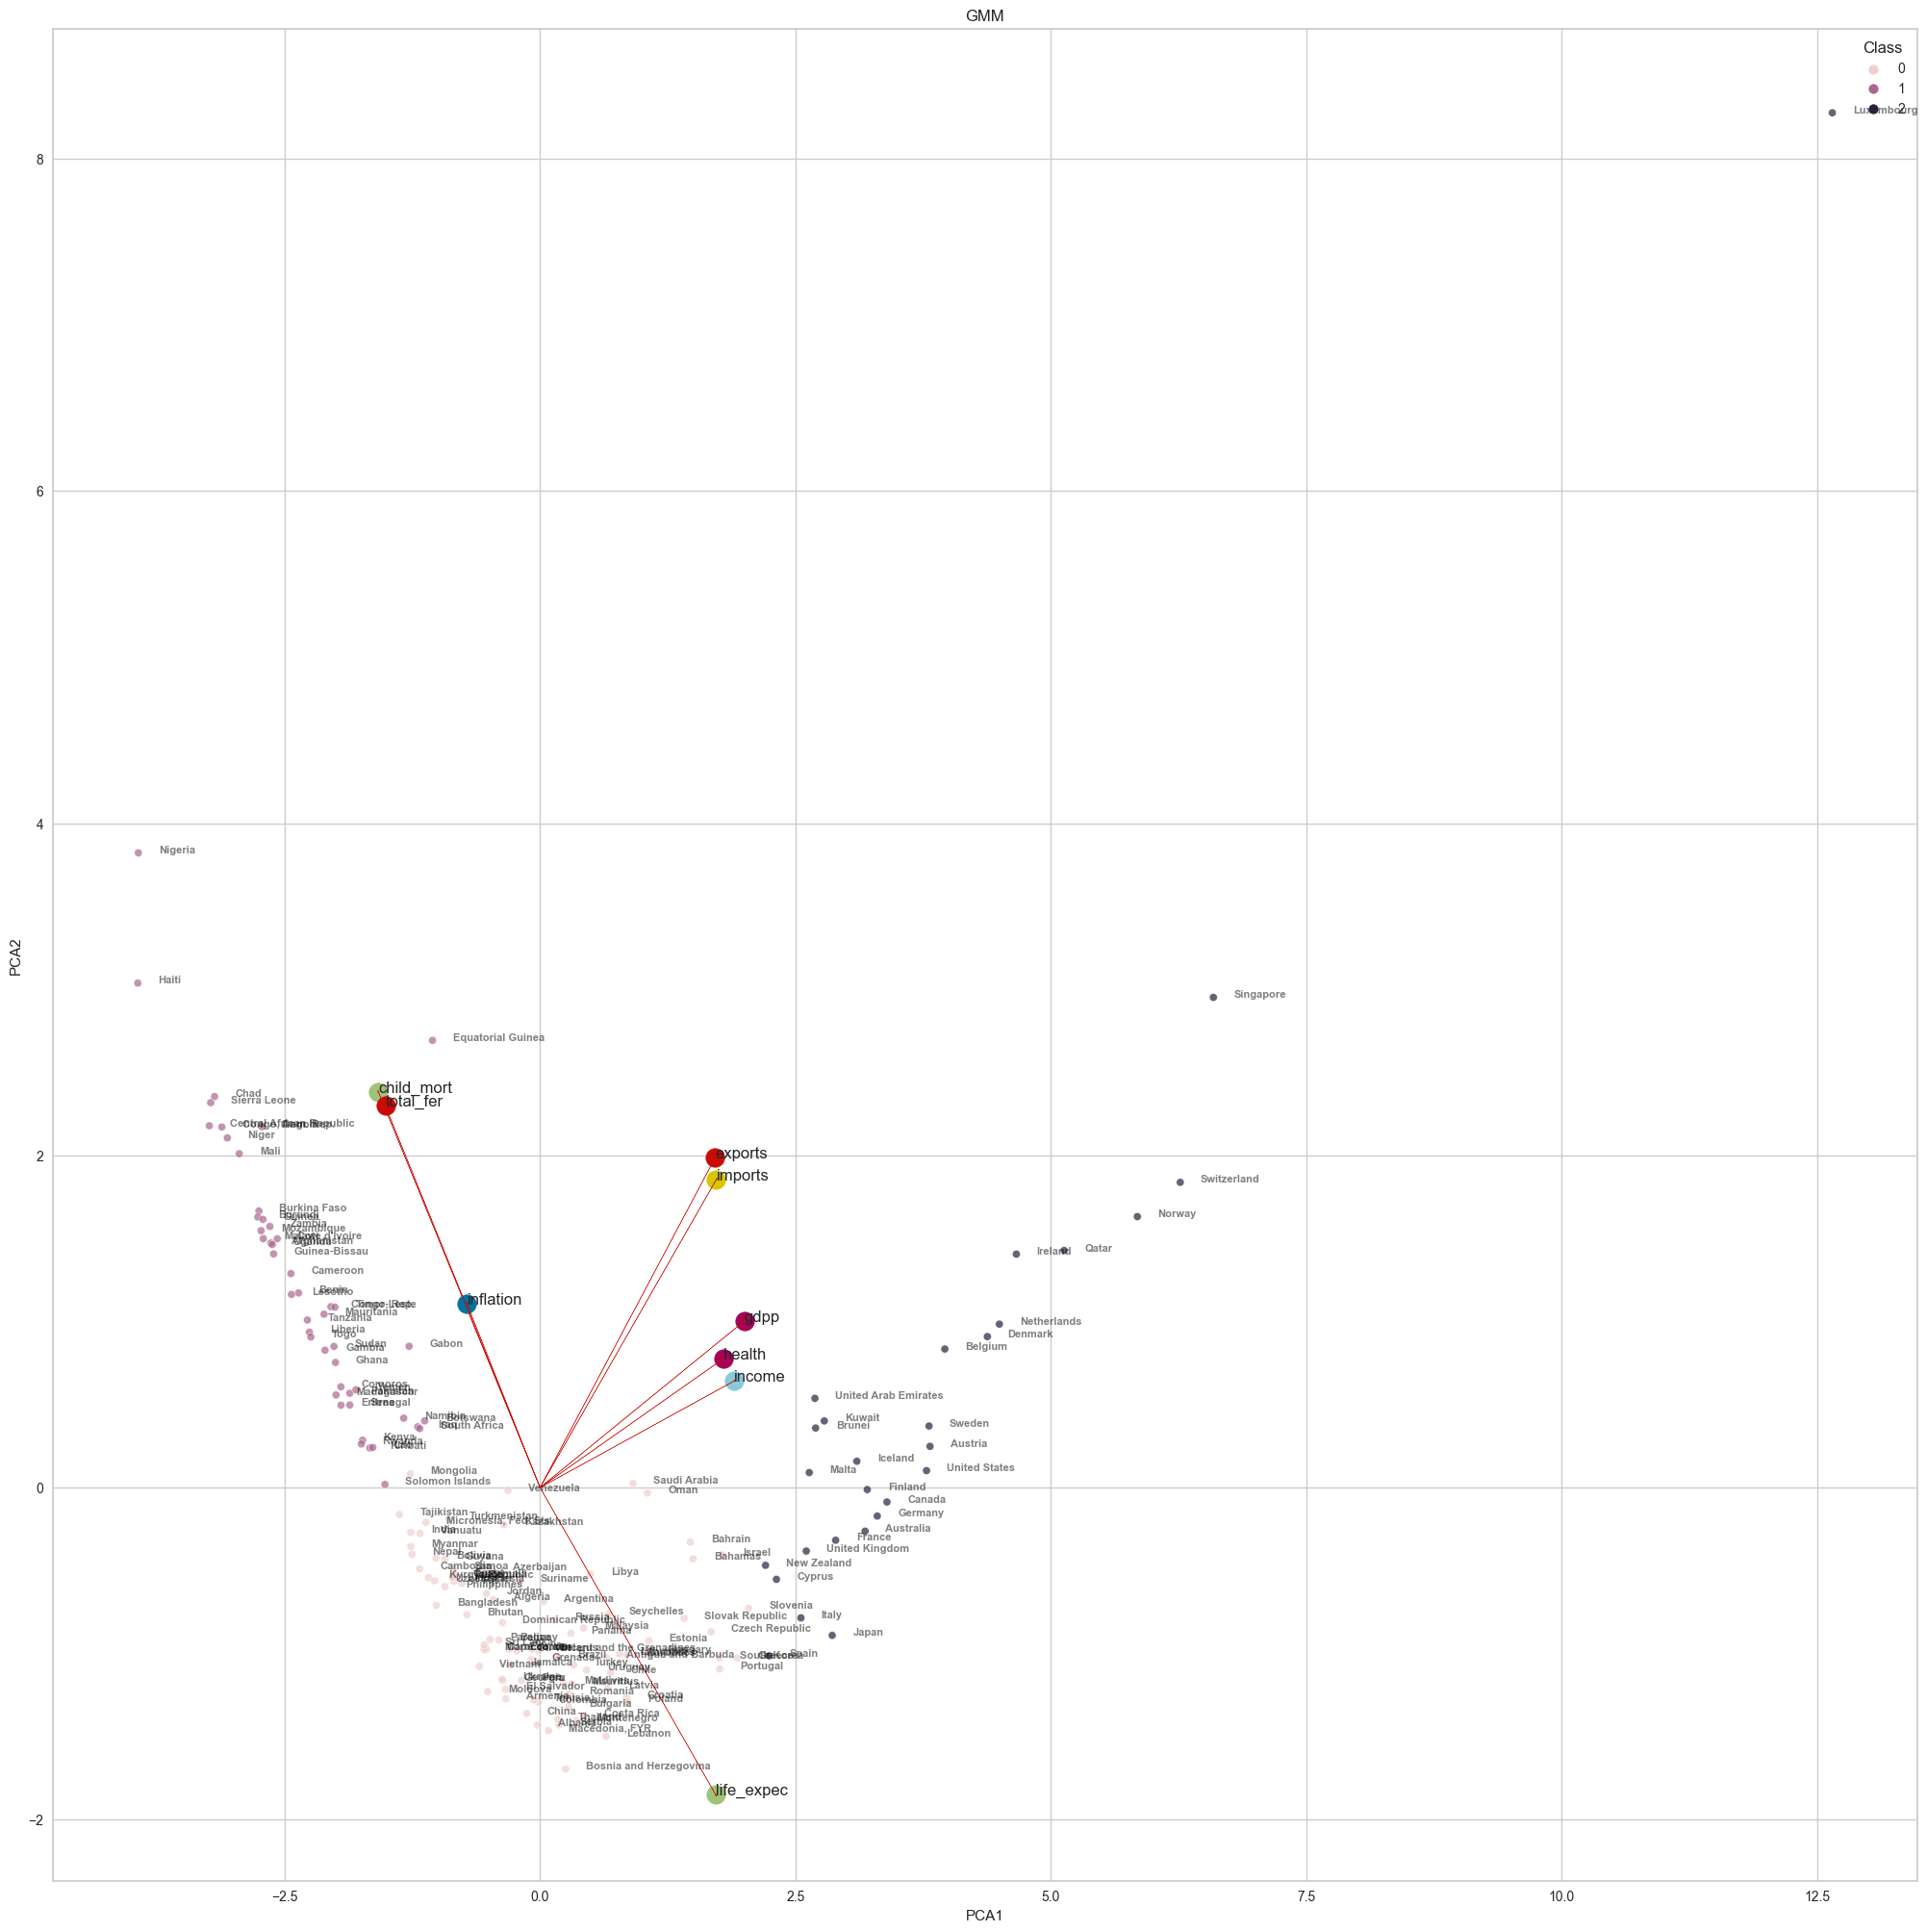

In [69]:

plt.figure(figsize=[25,25])
sns.scatterplot(x=X_pca1['PCA1'],y=X_pca1['PCA2'],hue=Country_data.Class,alpha=0.7,s=35)
n=Country_data.country
for i, txt in enumerate(n):
    plt.text(X_pca1.loc[i]['PCA1']+0.2, X_pca1.loc[i]['PCA2'],txt, horizontalalignment='left', size=8, color='black', weight='semibold',alpha=0.5)
plt.title('GMM')
# Get the loadings of x and y axes
xs = loadings[0]
ys = loadings[1]
for i, varnames in enumerate(feature_names):
    plt.scatter(xs[i]*5, ys[i]*5, s=200)
    plt.arrow(
        0, 0, # coordinates of arrow base
        xs[i]*5, # length of the arrow along x
        ys[i]*5, # length of the arrow along y
        color='r', 
        head_width=0.01
        )
    plt.text(xs[i]*5, ys[i]*5, varnames)
 

### Biplot

In [ ]:
pca_df_scaled = X_pca1.copy()
from sklearn.preprocessing import MinMaxScaler

standard_scaler = MinMaxScaler()
pca_df_scaled = standard_scaler.fit_transform(pca_df_scaled)
pca_df_scaled=pd.DataFrame(pca_df_scaled)
pca_df_scaled.columns=X_pca1.columns


In [ ]:
pca_df_scaled = X_pca1.copy()
 
scaler_df = X_pca1[['PCA1', 'PCA2']]
scaler = 1 / (scaler_df.max() - scaler_df.min())
 
for index in scaler.index:
    pca_df_scaled[index] *= scaler[index]


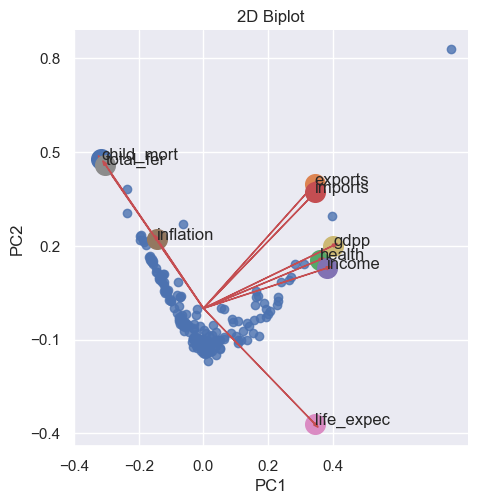

In [ ]:
# 2D
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set()
 
xs = loadings[0]
ys = loadings[1]
 
sns.lmplot(
    x='PCA1', 
    y='PCA2', 
    data=pca_df_scaled, 
    fit_reg=False, 
    )
 
for i, varnames in enumerate(feature_names):
    plt.scatter(xs[i], ys[i], s=200)
    plt.arrow(
        0, 0, # coordinates of arrow base
        xs[i], # length of the arrow along x
        ys[i], # length of the arrow along y
        color='r', 
        head_width=0.01
        )
    plt.text(xs[i], ys[i], varnames)
 
xticks = np.linspace(-0.4, 0.4, num=5)
yticks = np.linspace(-0.4, 0.8, num=5)
plt.xticks(xticks)
plt.yticks(yticks)
plt.xlabel('PC1')
plt.ylabel('PC2')
 
plt.title('2D Biplot')
plt.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_10976\2391774177.py:62: MatplotlibDeprecationWarning: The dist attribute was deprecated in Matplotlib 3.6 and will be removed two minor releases later.
  ax.dist = 5


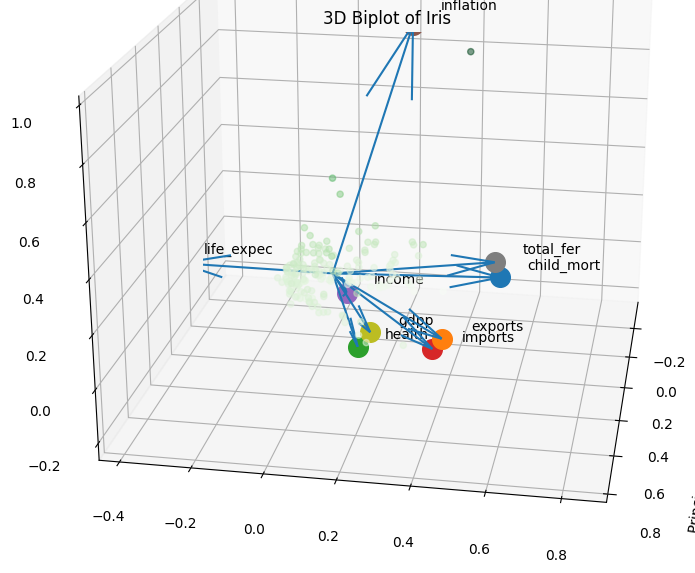

In [ ]:
import numpy as np 
import pandas as pd
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

pca_df_scaled = X_pca1.copy()
 
scaler_df = X_pca1[['PCA1', 'PCA2','PCA3']]
scaler = 1 / (scaler_df.max() - scaler_df.min())
 
for index in scaler.index:
    pca_df_scaled[index] *= scaler[index]
plt.style.use('default')

# Define scaled features as arrays
xdata = pca_df_scaled['PCA1']
ydata = pca_df_scaled['PCA2']
zdata = pca_df_scaled['PCA3']


 # Initialize the 3D graph
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot 3D scatterplot of PCA
ax.scatter3D(
    xdata, 
    ydata, 
    zdata, 
    c=zdata, 
    cmap='Greens', 
    alpha=0.5)
 
# Define the x, y, z variables
loadings = pca.components_
xs = loadings[0]
ys = loadings[1]
zs = loadings[2]
 
# Plot the loadings
for i, varnames in enumerate(feature_names):
    ax.scatter(xs[i], ys[i], zs[i], s=200)
    ax.text(
        xs[i] + 0.1, 
        ys[i] + 0.1, 
        zs[i] + 0.1, 
        varnames)
 
# Plot the arrows
x_arr = np.zeros(len(loadings[0]))
y_arr = z_arr = x_arr
ax.quiver(x_arr, y_arr, z_arr, xs, ys, zs)
 
# Plot title of graph
plt.title(f'3D Biplot of Iris')
 
# Plot x, y, z labels
ax.set_xlabel('Principal component 1', rotation=150)
ax.set_ylabel('Principal component 2')
ax.set_zlabel('Principal component 3', rotation=60)
ax.azim = 10
ax.dist = 5
ax.elev = 20
plt.show()

### Training Models on PCA Data

#### KMEANS

In [88]:
PcaDf=X_pca1[['PCA1','PCA2','PCA3']]

In [89]:
from sklearn.cluster import KMeans
kmeans = KMeans(random_state=42)

c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `

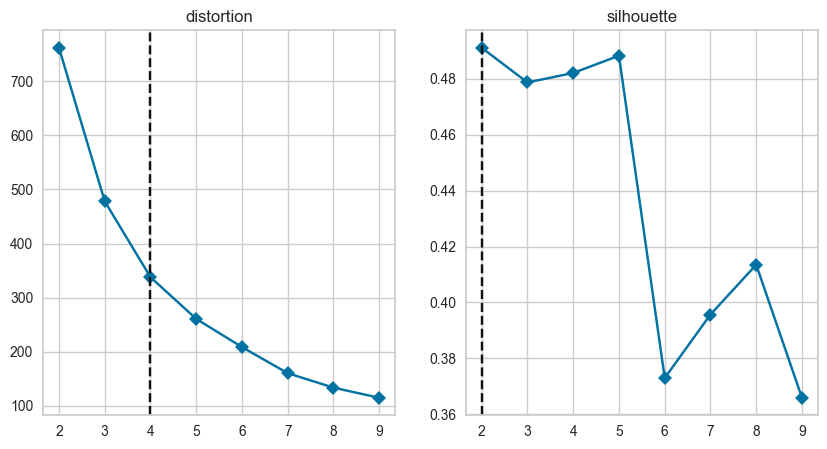

In [90]:
from yellowbrick.cluster import KElbowVisualizer
methods = ['distortion', 'silhouette']
count=0
plt.figure(figsize=(10,5))    
for i in methods:
    visualizer = KElbowVisualizer(kmeans, k=(2,10), metric = i, timings = False)
    count +=1 
    plt.subplot(1,2,count)
    plt.title(i)
    visualizer.fit(PcaDf)
    #visualizer.show()
    
plt.show()

Number of Clusters= 2 Score is : 0.49108478316821597
Number of Clusters= 3 Score is : 0.4786795843501643
Number of Clusters= 4 Score is : 0.4820799554959587
Number of Clusters= 5 Score is : 0.48776714397406323
Number of Clusters= 6 Score is : 0.47087169342853485
Number of Clusters= 7 Score is : 0.4020757470298052
Number of Clusters= 8 Score is : 0.4004416398455466
Number of Clusters= 9 Score is : 0.3644513539614074
Number of Clusters= 10 Score is : 0.385228042888128


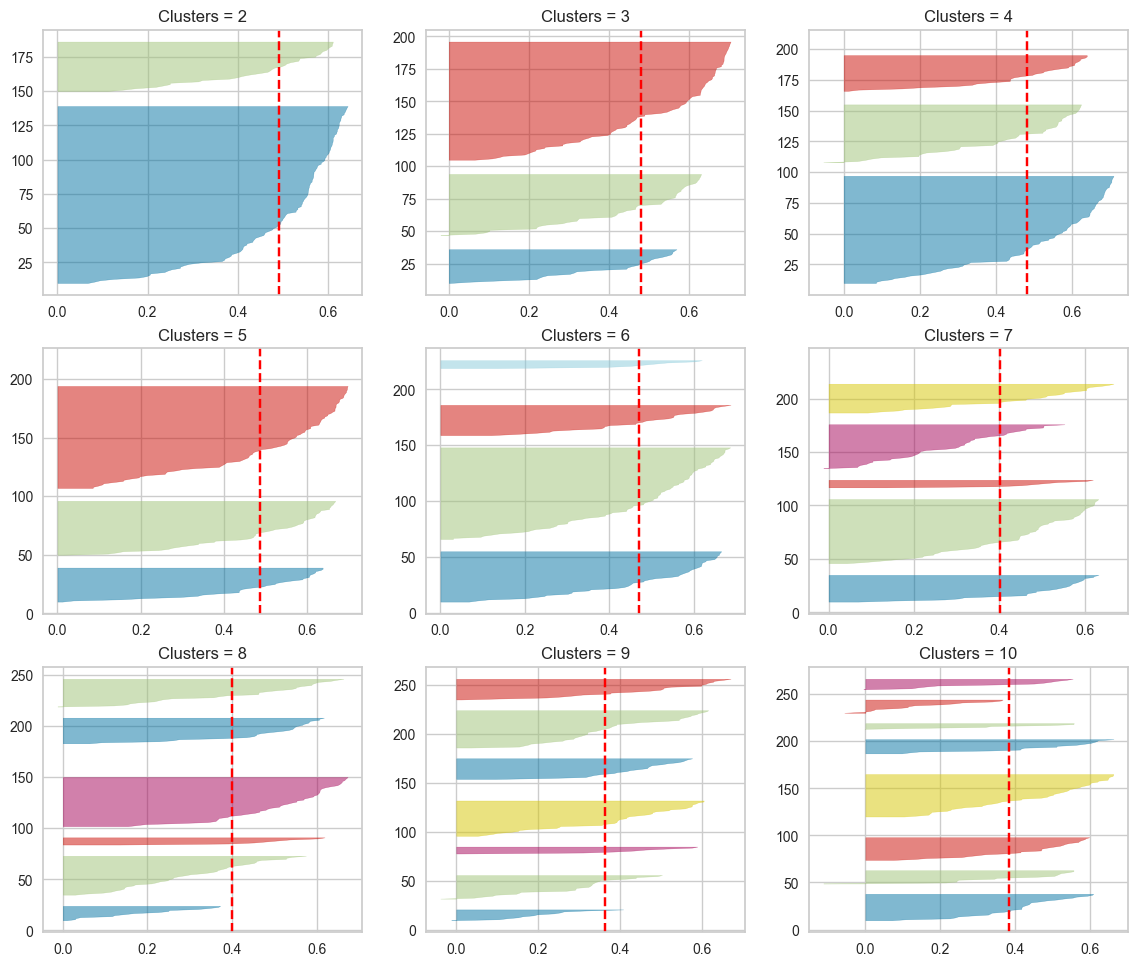

In [91]:
# sub plot
from yellowbrick.cluster import SilhouetteVisualizer
plt.figure(figsize=(14,20))
for k in range(2,11):
    plt.subplot(5, 3, k - 1)
    visualizer = SilhouetteVisualizer(
        KMeans(k, n_init=150), colors='yellowbrick')
    visualizer.fit(PcaDf)
    strr='Clusters = '+ str(k)
    plt.title(strr)
    print('Number of Clusters=',k,'Score is :', visualizer.silhouette_score_)
    # visualizer.show()
    

In [95]:
from sklearn.cluster import KMeans
kmeans = KMeans(4,random_state=42)
kmeans.fit(PcaDf)

c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=42)

In [96]:
kClass=kmeans.predict(PcaDf)

In [98]:
Country_data['kClass'] = kClass

In [101]:
for i in Country_data.kClass.unique():
    print("Cluster ", i,':\n')
    print(Country_data[Country_data.kClass == i].country.values)  

Cluster  1 :

['Afghanistan' 'Angola' 'Benin' 'Botswana' 'Burkina Faso' 'Burundi'
 'Cameroon' 'Central African Republic' 'Chad' 'Comoros' 'Congo, Dem. Rep.'
 'Congo, Rep.' "Cote d'Ivoire" 'Equatorial Guinea' 'Eritrea' 'Gabon'
 'Gambia' 'Ghana' 'Guinea' 'Guinea-Bissau' 'Haiti' 'Iraq' 'Kenya'
 'Kiribati' 'Lao' 'Lesotho' 'Liberia' 'Madagascar' 'Malawi' 'Mali'
 'Mauritania' 'Mozambique' 'Namibia' 'Niger' 'Nigeria' 'Pakistan' 'Rwanda'
 'Senegal' 'Sierra Leone' 'Solomon Islands' 'South Africa' 'Sudan'
 'Tanzania' 'Timor-Leste' 'Togo' 'Uganda' 'Yemen' 'Zambia']
Cluster  2 :

['Albania' 'Algeria' 'Antigua and Barbuda' 'Argentina' 'Armenia'
 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus'
 'Belize' 'Bhutan' 'Bolivia' 'Bosnia and Herzegovina' 'Brazil' 'Bulgaria'
 'Cambodia' 'Cape Verde' 'Chile' 'China' 'Colombia' 'Costa Rica' 'Croatia'
 'Czech Republic' 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador'
 'Estonia' 'Fiji' 'Georgia' 'Grenada' 'Guatemala' 'Guyana' 'Hungary'
 'I

Text(0.5, 1.0, 'GMM')

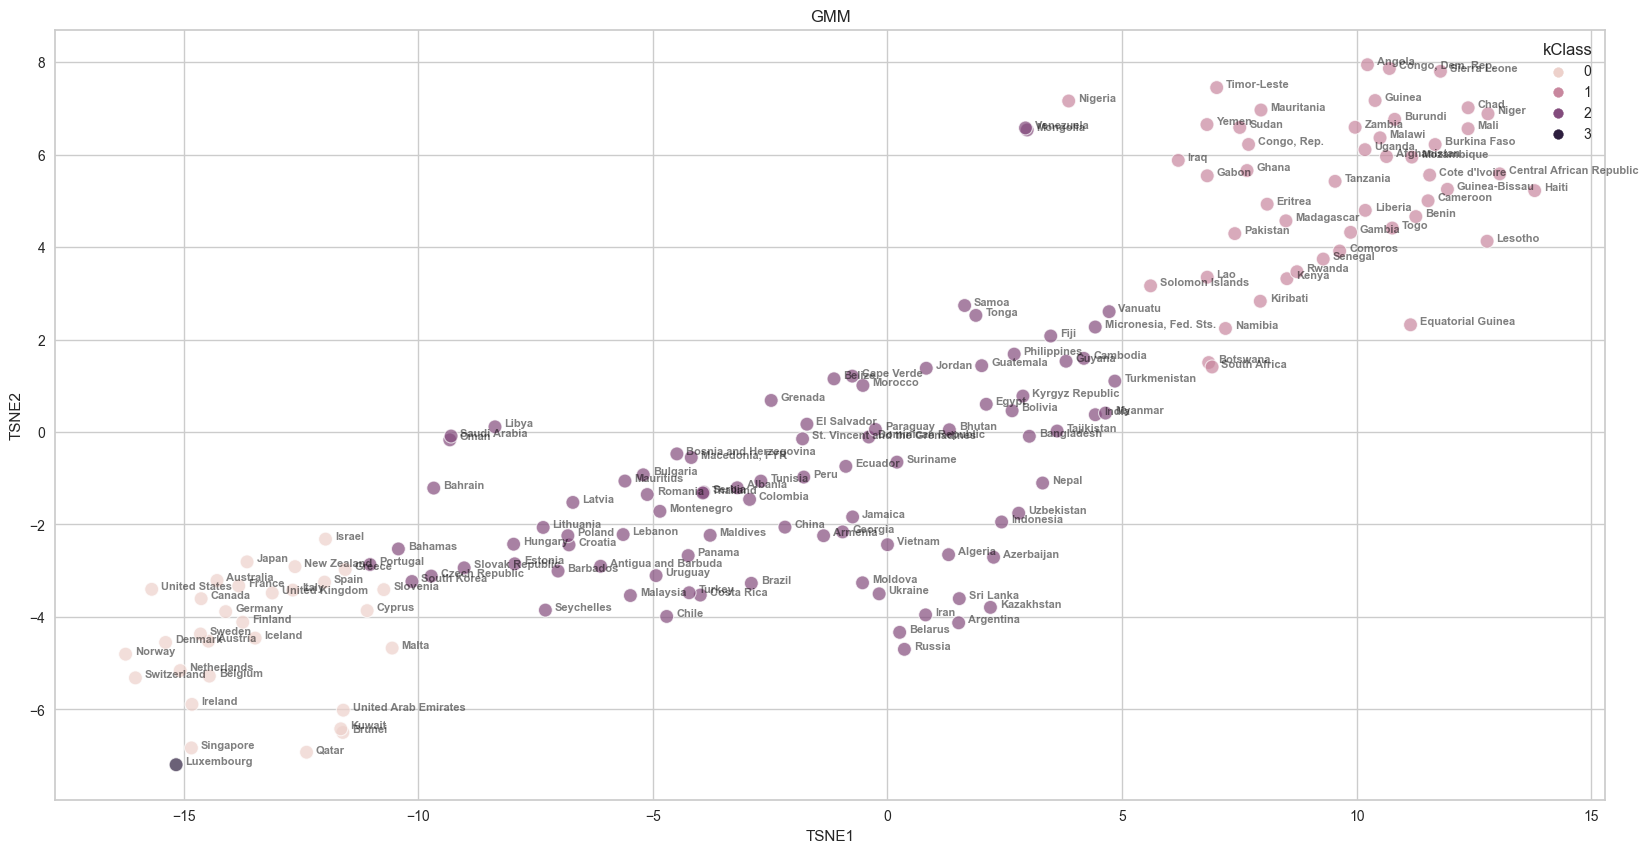

In [102]:
plt.figure(figsize=[20,10])
sns.scatterplot(x=X_tsne1['TSNE1'],y=X_tsne1['TSNE2'],hue=Country_data.kClass,alpha=0.7,s=100)
n=Country_data.country
for i, txt in enumerate(n):
    plt.text(X_tsne1.loc[i]['TSNE1']+0.2, X_tsne1.loc[i]['TSNE2'],txt, horizontalalignment='left', size=8, color='black', weight='semibold',alpha=0.5)
plt.title('GMM')

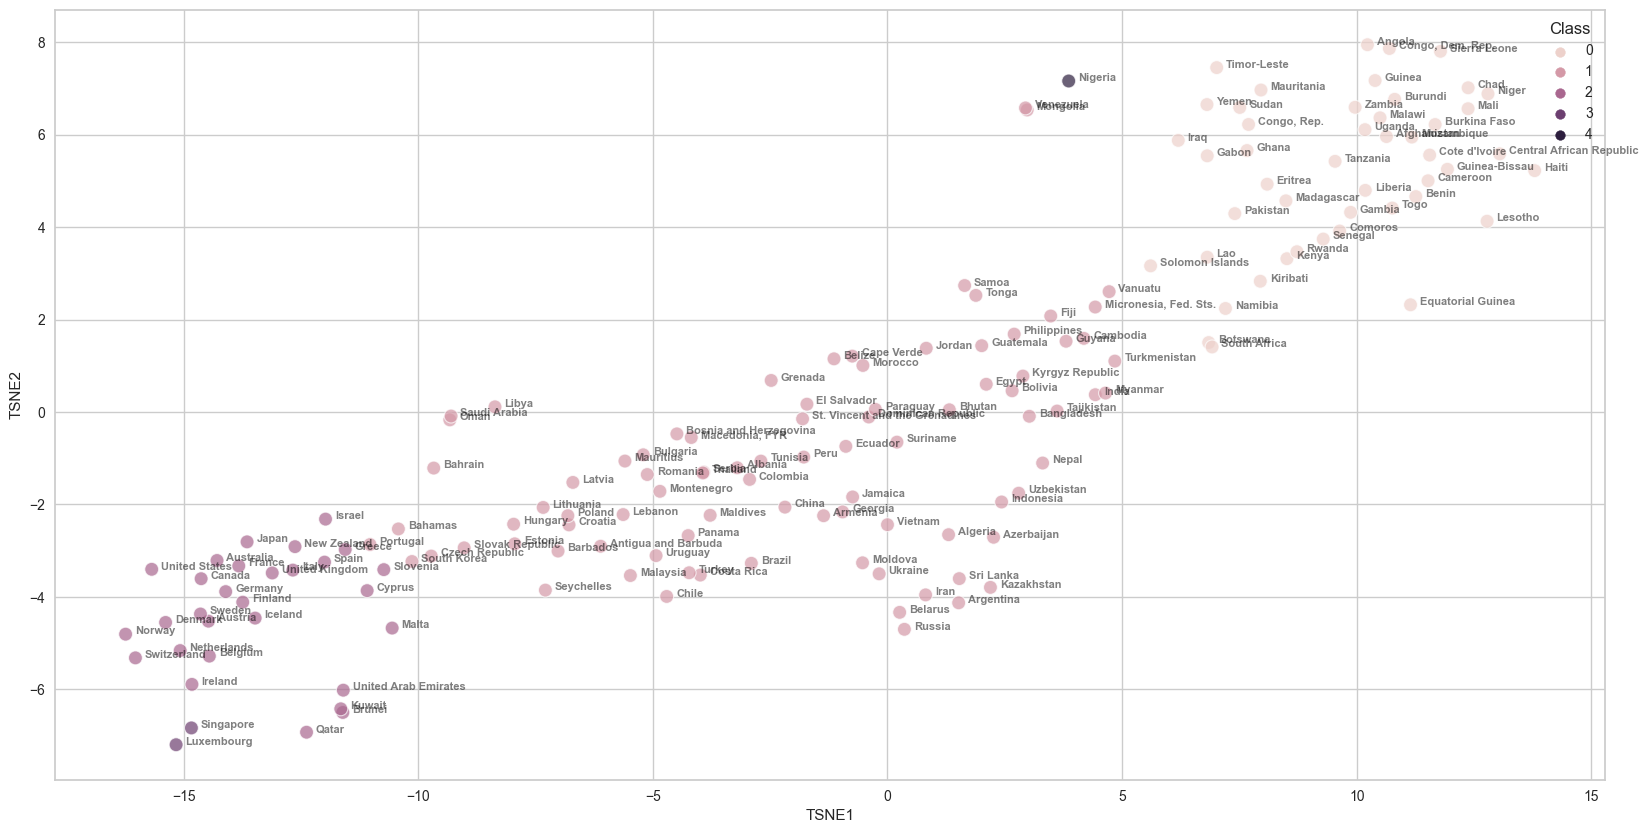

In [104]:
plt.figure(figsize=[20,10])
sns.scatterplot(x=X_tsne1['TSNE1'],y=X_tsne1['TSNE2'],hue=Country_data['Class'],alpha=0.7,s=100)
n=Country_data.country
for i, txt in enumerate(n):
    plt.text(X_tsne1.loc[i]['TSNE1']+0.2, X_tsne1.loc[i]['TSNE2'],txt, horizontalalignment='left', size=8, color='black', weight='semibold',alpha=0.5)
#    ax.annotate(txt[0], (X_tsne1['TSNE1'],X_tsne1['TSNE2']))